# Data Analytics: Understanding Customers

## Autor: Javier Orcoyen

### Julio/Agosto 2021

# 1. Introduction Business

El proyecto a realizar se dividirá en 2 fases/tareas:

#### Task 1 - Investigate Customer Buying Patterns

We need to use data mining methods to explore the customer transaction data collected from recent online and in-store sales to infer any insights and conclusions about customer purchasing behavior, specifically:

* Do customers in different regions spend more per transaction? Which regions spend the most/least?
* Is there a relationship between the number of items purchased and amount spent?

#### Task 2 - Investigate Customer Demographics

We need to use data mining methods to explore the customer transaction data collected from recent online and in-store sales to infer any insights and conclusions about customer purchasing behavior, specifically:

* Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?
* Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

# 2. Description of the data

### Importar librerías

In [1]:
# Importa las librerías que vamos a necesitar para el análisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Leer el dataset

In [2]:
# Guarda los datos del fichero CSV en la variable 'df' de tipo "dataframe"
df = pd.read_csv('Demographic_Data.csv')

### Ánalisis preliminar de los datos

In [3]:
# Muestra las primeras 5 filas del dataset
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
# Muestra el nombre de las columnas del dataset
df.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [5]:
# Información sobre el dataset, con esto comprobamos que hay 80.000 registros y que todas las variables son de tipo númérico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
# Más información acerca del dataset, con esto comprobamos, entre otros, valores mínimos y máximos de cada variable
df.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


# 3. Data preparation

### Valores duplicados

In [7]:
# En cuanto a eliminar duplicados, identificamos las filas duplicadas
duplicatedRowsDF = df[df.duplicated()]
print(duplicatedRowsDF)

       in-store  age  items   amount  region
17858         0   76      6   283.61       2
26112         0   67      4   320.41       2
29343         1   23      2  1019.50       4
33834         1   38      3  1993.80       1
34214         1   31      5  1488.10       4
34706         0   39      5  1268.00       4
35971         0   38      7   391.51       2
43958         1   22      1  1303.20       4
44308         1   26      5  1495.70       4
45164         0   79      6   342.28       2
47414         0   27      6  1555.10       4
51600         0   56      2  1941.70       4
52013         1   50      5  1889.40       1
53652         0   29      2   144.43       2
58454         0   76      1   259.44       2
59539         1   49      2  1162.00       4
59859         0   30      7  2535.10       4
61439         1   32      4  1106.10       4
63970         1   42      5  1731.10       4
75506         0   44      2  1756.70       4
78688         1   40      2  1080.60       1


In [8]:
# De 80.000 registros únicamente hay 21 duplicados
len(duplicatedRowsDF)

21

In [9]:
# Dado que podría ser que el mismo usuario haya realizado la misma compra más de una vez, de momento no los eliminamos
# df = df.drop_duplicates()

### Valores nulos

In [10]:
# En cuanto a valores nulos, imprimimos por pantalla la suma y el resultado es 0, por lo que continuamos con el análisis
print(df.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


### Posibles valores de cada variable

In [11]:
# Verificamos que todas las variables son de tipo numérico
df.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [12]:
# Comprobamos los valores únicos de la variable 'in-store': 0 para ventas online y 1 para ventas físicas según el enunciado
df['in-store'].unique()

array([0, 1], dtype=int64)

In [13]:
# Comprobamos los valores únicos ordenados de la variable 'age': compras realizadas por usuarios desde 18 a 85 años
np.sort(df['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
      dtype=int64)

In [14]:
# Comprobamos los valores únicos ordenados de la variable 'items': compras de 1 hasta 8 productos
np.sort(df['items'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [15]:
# Comprobamos los valores únicos ordenados de la variable 'region': 1.Norte, 2.Sur, 3.Este y 4.Oeste según el enunciado
np.sort(df['region'].unique())

array([1, 2, 3, 4], dtype=int64)

### Outliers

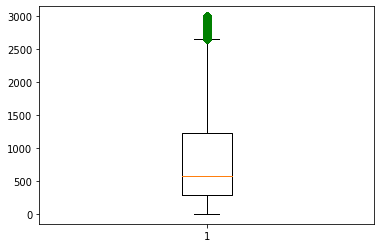

In [16]:
# Comprobamos outliers en amount
A = df['amount']
plt.boxplot(A,0,'gD')
plt.show()

Conclusión - Existen outliers en los valores más grandes de amount, pero entendiendo que las compras de mayor importe pueden ser menos frecuentes, los mantenemos en el dataframe

### Matriz de correlación

In [17]:
# Calcula la matriz de correlación
corr_mat = df.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


Conclusión - De esta matriz, podemos deducir por los coeficientes de correlación que las principales relaciones entre variables a analizar son:
- 'amount' - 'region' -> Correlación positiva de 0.4, por lo que si una de las dos aumenta/disminuye, la otra también aumenta/disminuye
- 'amount' - 'age' -> Correlación negativa de -0.28, lo que implica que según una de las dos aumenta/disminuye, la otra disminuye/aumenta
- 'region' - 'age' -> Correlación negativa de -0.23, lo que implica que según una de las dos aumenta/disminuye, la otra disminuye/aumenta
- 'in-store' - 'age' -> Correlación negativa de -0.18, lo que implica que según una de las dos aumenta/disminuye, la otra disminuye/aumenta
- 'in-store' - 'region' -> Correlación negativa de -0.13, lo que implica que según una de las dos aumenta/disminuye, la otra disminuye/aumenta    

### Matriz de covarianza

In [18]:
# Matriz de covarianza
cov_mat = df.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400718 -0.004075     -30.825404   -0.074988
age       -1.400718   246.982562  0.021980   -3197.566591   -4.168901
items     -0.004075     0.021980  4.248703       0.545629   -0.004471
amount   -30.825404 -3197.566591  0.545629  520235.802331  327.903000
region    -0.074988    -4.168901 -0.004471     327.903000    1.269391


# 4. Exploratory analysis

### Análisis de 'in-store' (canal de venta) y su relación con el resto de variables

###### Distribución de las ventas en función del canal (online o físicas)

In [19]:
# Distribución del número de ventas en función de si han sido online (0) o físicas (1)
a=df.groupby('in-store')['in-store'].count()
a

in-store
0    40000
1    40000
Name: in-store, dtype: int64

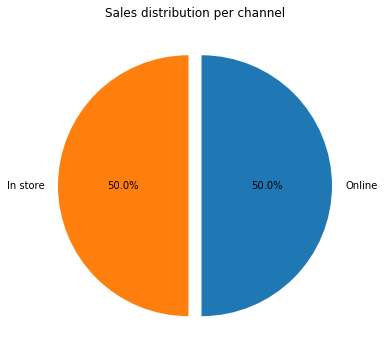

In [20]:
# Distribución del número de ventas por canal representado en un gráfico de tarta
pie, ax = plt.subplots(figsize=[10,6])
# Incluimos las etiquetas de forma manual, primero 0 = Online y luego 1 = In store
labels = ['Online', 'In store']
plt.pie(x=a, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, startangle=-90)
plt.title("Sales distribution per channel");

Conclusión - Del total de 80.000 ventas, la mitad han sido online y la otra mitad físicas

###### Distribución de ventas por canal (online o físicas) y por región de USA (norte, sur, este y oeste)

In [21]:
# Distribución de las ventas por región en función de si han sido online o físicas
df.groupby(['in-store', 'region'])['region'].count()

in-store  region
0         2         20000
          3          7001
          4         12999
1         1         16000
          3         10999
          4         13001
Name: region, dtype: int64

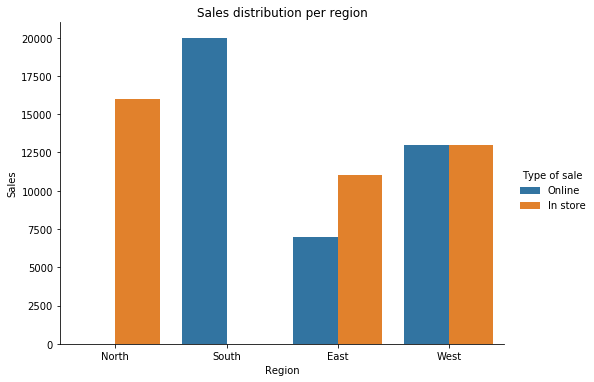

In [22]:
# Distribución gráfica de las ventas por región en función de si han sido online o físicas
g = sns.catplot(x='region', data=df, hue='in-store', kind='count', aspect=1.5)
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per region')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)    
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.85)
# Sustituir 1 por North, 2 por South, 3 por East y 4 por West en el eje X
g.set_xticklabels(['North','South','East','West'])

Conclusiones
- Las regiones ordenadas por número de ventas online son: Sur (20.000), Oeste (12.999) y Este (7.001)
- Las regiones ordenadas por número de ventas físicas son: Norte (16.000), Oeste (13.001) y Este (10.999)
- No ha habido ventas online en la región 1 (Norte) y no ha habido ventas físicas en la región 2 (Sur)

In [23]:
# Asegurar que en la siguiente gráfica se van a marcar los bordes de las barras 
sns.set_context(rc = {'patch.linewidth': 1.0})

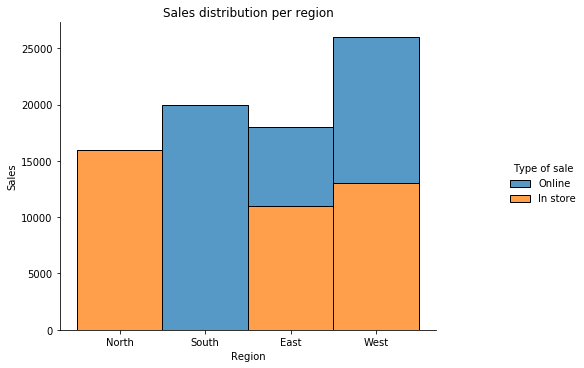

In [24]:
# Misma distribución que la gráfica anterior, pero representada en un diagrama de barras apiladas
g=sns.displot(data=df, x="region", hue="in-store", multiple="stack", discrete=True, aspect=1.5)
g.set(xticks=[1,2,3,4])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per region')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.75)

Conclusiones
- La región con más ventas es la región Oeste (26.000), con un número similar de ventas online (12.999) y físicas (13.001)
- La siguiente región con más ventas es la Sur (20.000), destacando que únicamente se han realizado ventas online
- La siguiente región es la Este (18.000), con un número de ventas físicas (10.999) ligeramente superior al de ventas online (7.001)
- La región con menos ventas es la Norte (16.000), destacando que únicamente se han realizado ventas físicas

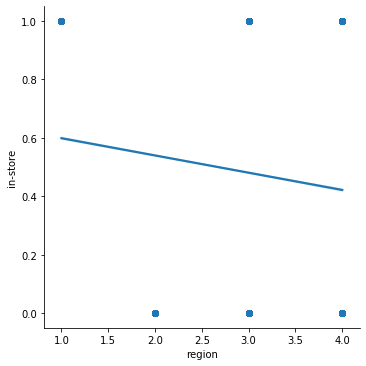

In [25]:
# Relación entre region y canal de venta
sns.lmplot(x='region',y='in-store', data=df)

Como se ha visto anteriormente con el coeficiente de correlación (-0.13), parece que las compras tienden a ser online según la región cambia de Norte (1) a Sur (2), Este (3) y Oeste (4).

No obstante, dado que las regiones en el dataframe aparecen como 1,2,3 y 4 y teniendo en cuenta que la región Norte no tiene compras online, que la región Sur no tiene compras físicas y que en las regiones Este y Oeste las compras se distribuyen de forma más o menos uniforme entre online y físicas, no creo que haya que considerar la relación como algo relevante.

###### Distribución de ventas por canal (online o físicas) y por edad

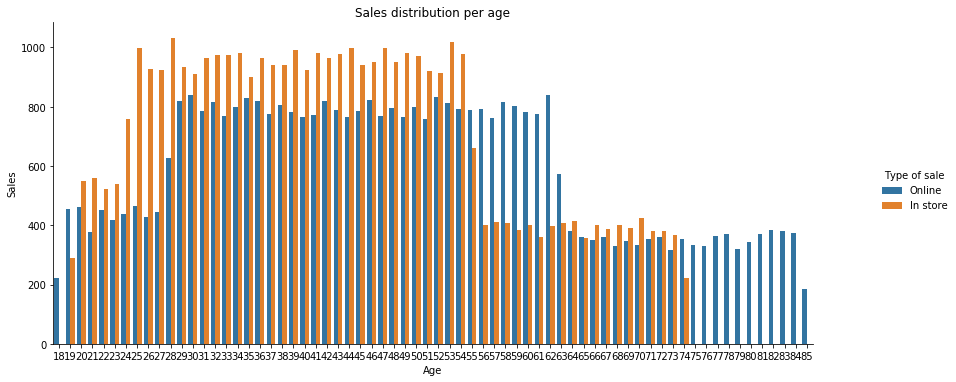

In [26]:
# Distribución de las ventas por edad en función de si han sido online o físicas
g = sns.catplot(x='age', data=df, hue='in-store', kind='count', aspect=2.5)
# Nombre de los ejes
g.set_xlabels('Age')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per age')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)    
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.85)


Conclusión
- No hay ventas físicas para 18 años ni a partir de 75 años
- Salvo para 18 y 19, el número de ventas físicas es superior al número de ventas online hasta los 54 años
- A partir de los 55 años las ventas físicas disminuyen notablemente, desapareciendo a partir de los 75 años
- Hay ventas online para todas las edades, habiendo mayor número para las edades entre 29 y 62 años

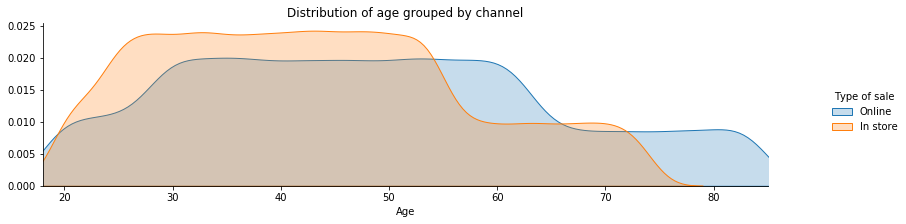

In [27]:
# Distribución de edades en función del canal utilizado
g = sns.FacetGrid(df, hue='in-store', aspect=4)
g.map(sns.kdeplot, 'age', shade=True)
g.set(xlim=(df['age'].min(),df['age'].max()))
g.set(title='Distribution of age grouped by channel')
g.add_legend()
# Nombre de los ejes
g.set_xlabels('Age')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    # Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.85)

###### Distribución de ventas por canal (online o físicas) y por rango de edad

In [28]:
# Discretizar las ventas por rangos de edad de cara a representar los datos de forma agrupada
def age_text(user):
    age = user
    
    if age >= 18 and age < 35:
        return '<35'
    elif age >= 35 and age < 52:
        return '35-50'
    elif age >= 52 and age < 69:
        return '50-65'
    elif age >= 69:
        return '>65'

In [29]:
# Crea una nueva columna en el dataset indicando el rango de edad del usuario que realizó la compra
df['age_text'] = df['age'].apply(age_text)

In [30]:
# Distribución de las ventas por rango de edad en función de si han sido online o físicas
a = df.groupby(['in-store', 'age_text'])['age_text'].count()
a.reindex(['<35', '35-50', '50-65', '>65'], level='age_text')

in-store  age_text
0         <35          9619
          35-50       13418
          50-65       11149
          >65          5814
1         <35         12835
          35-50       16305
          50-65        8699
          >65          2161
Name: age_text, dtype: int64

In [31]:
# Edad media para cada tipo de venta (online o físicas)
b = np.round(df.pivot_table('age', 'in-store', aggfunc=np.mean, margins=False),0)
b.astype('int')

,age
in-store,
0,49
1,43


Conclusión - Se puede comprobar que la media de edad es mayor para compras online que físicas

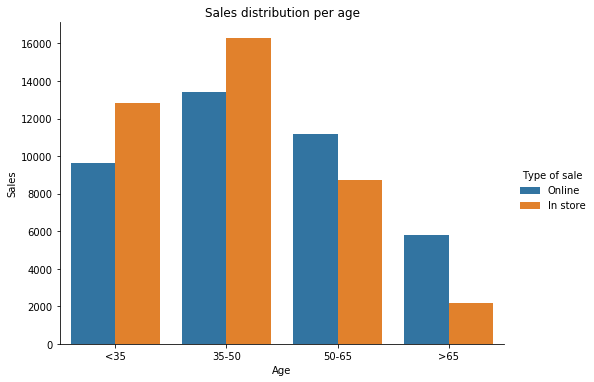

In [32]:
# Ordena el dataframe según los valores de age_text, para que salgan así representados en el eje X de la gráfica
df['age_text'] = pd.Categorical(df['age_text'],categories=['<35', '35-50', '50-65', '>65'],ordered=True)
df = df.sort_values('age_text',ascending=False)

# Distribución gráfica de las ventas por rango de edad en función de si han sido online o físicas
g = sns.catplot(x='age_text', data=df, hue='in-store', kind='count', aspect=1.5)
# Nombre de los ejes
g.set_xlabels('Age')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per age')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)    
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.85)
# Sustituir 1 por North, 2 por South, 3 por East y 4 por West en el eje X

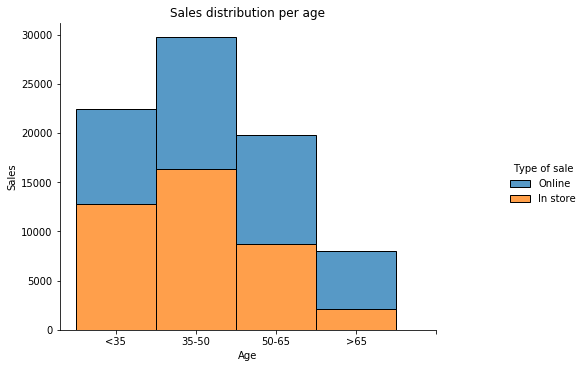

In [33]:
# Ordena el dataframe según los valores de age_text, para que salgan así representados en el eje X de la gráfica
df['age_text'] = pd.Categorical(df['age_text'],categories=['<35', '35-50', '50-65', '>65'],ordered=True)
df = df.sort_values('age_text',ascending=False)

# Distribución de ventas por rangos de edad en un diagrama de barras apiladas
g=sns.displot(data=df, x="age_text", hue="in-store", multiple="stack", discrete=True, aspect=1.5)
g.set(xticks=[0,1,2,3,4])
g.set_xticklabels(['<35','35-50','50-65','>65'])
# Nombre de los ejes
g.set_xlabels('Age')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per age')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.75)

Conclusión - Los rangos de edad ordenados por número de ventas son: 35-50, <35, 50-65 y >65

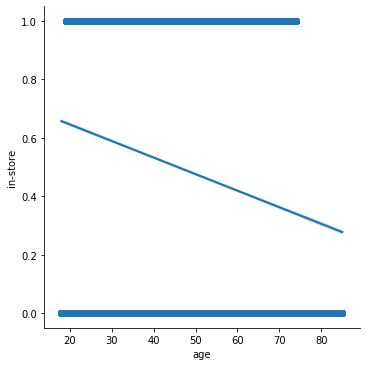

In [34]:
# Relación entre edad y canal de venta
sns.lmplot(x='age',y='in-store', data=df)

Como se ha visto anteriormente con el coeficiente de correlación (-0.18), parece que las compras tienden a ser online según la edad aumenta.

###### Distribución de ventas por canal (online o físicas) y por beneficio obtenido

In [35]:
# Distribución del número de ventas en función del beneficio obtenido
a=df.pivot_table('amount', 'in-store', aggfunc=np.sum, margins=False)
a.astype('int')

,amount
in-store,
0,35902788
1,30970785


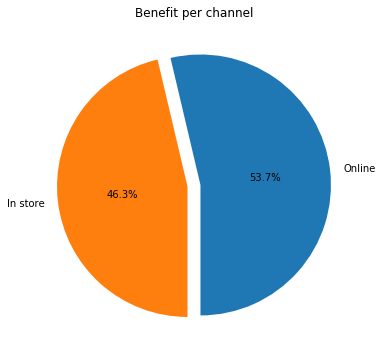

In [36]:
# Distribución de la cantidad gastada por canal representado en un gráfico de tarta
pie, ax = plt.subplots(figsize=[10,6])
# Incluimos las etiquetas de forma manual, primero 0 = Online y luego 1 = In store
labels = ['Online', 'In store']
plt.pie(x=a.amount, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, startangle=-90)
plt.title("Benefit per channel");

Conclusión - Teniendo en cuenta que hay un 50% de ventas online y otro 50% de ventas físicas, parece que es ligeramente más rentable el canal online

###### Distribución de ventas por canal (online o físicas) y por rango de cantidad gastada por compra

In [37]:
# Discretizar las ventas por rangos de cantidad gastada
def amount_text(user):
    amount = user
    
    if amount >= 0 and amount < 500:
        return '<500'
    elif amount >= 500 and amount < 1000:
        return '500-1000'
    elif amount >= 1000 and amount < 1500:
        return '1000-1500'
    elif amount >= 1500 and amount < 2000:
        return '1500-2000'
    elif amount >= 2000 and amount < 2500:
        return '2000-2500'
    elif amount >= 2500:
        return '>2500'

In [38]:
# Crea una nueva columna en el dataset indicando el rango de edad del usuario que realizó la compra
df['amount_text'] = df['amount'].apply(amount_text)

In [39]:
# Distribución del número de ventas realizadas por beneficio obtenido
df.groupby('amount_text')['amount_text'].count().reindex(['<500', '500-1000', '1000-1500', '1500-2000','2000-2500','>2500'])

amount_text
<500         36820
500-1000     19165
1000-1500     8614
1500-2000     8650
2000-2500     3379
>2500         3372
Name: amount_text, dtype: int64

In [40]:
# Distribución de las ventas por beneficio obtenido en función de si han sido online o físicas
a = df.groupby(['in-store', 'amount_text'])['amount_text'].count()
a.reindex(['<500', '500-1000', '1000-1500', '1500-2000','2000-2500','>2500'], level='amount_text')

in-store  amount_text
0         <500           22748
          500-1000        3459
          1000-1500       3516
          1500-2000       3526
          2000-2500       3379
          >2500           3372
1         <500           14072
          500-1000       15706
          1000-1500       5098
          1500-2000       5124
Name: amount_text, dtype: int64

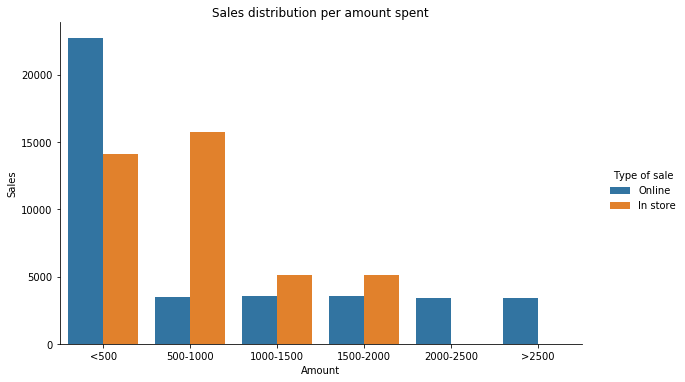

In [41]:
# Orden del eje X en la gráfica
xorder = ['<500','500-1000','1000-1500','1500-2000','2000-2500','>2500']

# Distribución de las ventas por beneficio obtenido en función de si han sido online o físicas
g = sns.catplot(x='amount_text', data=df, hue='in-store', kind='count', aspect=1.75, order=xorder)
# Nombre de los ejes
g.set_xlabels('Amount')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per amount spent')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)    
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.85)

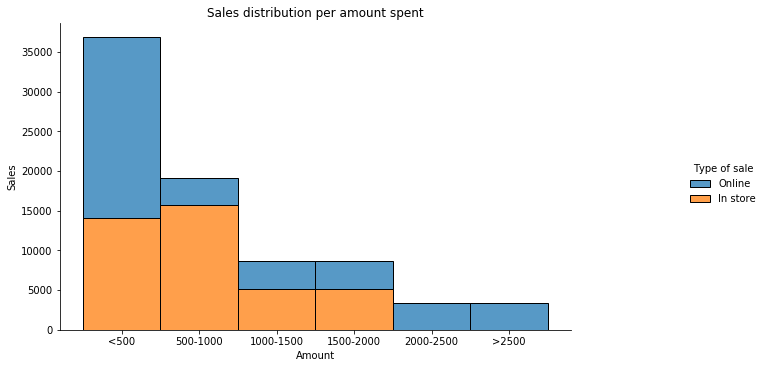

In [42]:
# Ordena el dataframe según los valores de amount_text, para que salgan así representados en el eje X de las gráficas
df['amount_text'] = pd.Categorical(df['amount_text'],categories=['<500','500-1000','1000-1500','1500-2000','2000-2500','>2500'],ordered=True)
df = df.sort_values('amount_text',ascending=False)

# Misma distribución que la gráfica anterior, pero representada en un diagrama de barras apiladas
g=sns.displot(data=df, x="amount_text", hue="in-store", multiple="stack", discrete=True, aspect=2)
# Nombre de los ejes
g.set_xlabels('Amount')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per amount spent')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.75)

Conclusión
- La mayoría de las compras son de <500, y según aumenta la cantidad gastada por venta, el número de ventas es menor
- Las compras más caras (2000-2500 y >2500) son únicamente online
- Las mayoría de compras online son de menos de 500, mientras que en el resto de rangos el número se mantiene estable
- Las mayoría de compras físicas son de menores de 500 o están entre 500-1000

###### Distribución de ventas por número de items adquiridos

In [43]:
# Distribución del número de ventas realizadas por items adquiridos
df.groupby('items')['items'].count()

items
1     5701
2    11290
3    11487
4    11596
5    11238
6    11522
7    11378
8     5788
Name: items, dtype: int64

Conclusión - Las cantidad de ventas de 1 u 8 ítems es aproximadamente la mitad que las ventas de 2, 3, 4, 5, 6 o 7 ítems

In [44]:
# Distribución de las ventas por número de items adquiridos en función de si han sido online o físicas
df.groupby(['in-store', 'items'])['items'].count()

in-store  items
0         1        2841
          2        5682
          3        5687
          4        5775
          5        5566
          6        5724
          7        5815
          8        2910
1         1        2860
          2        5608
          3        5800
          4        5821
          5        5672
          6        5798
          7        5563
          8        2878
Name: items, dtype: int64

Conclusión - Las ventas se dividen aproximadamente al 50% entre online o físicas independientemente del número de ítems adquiridos

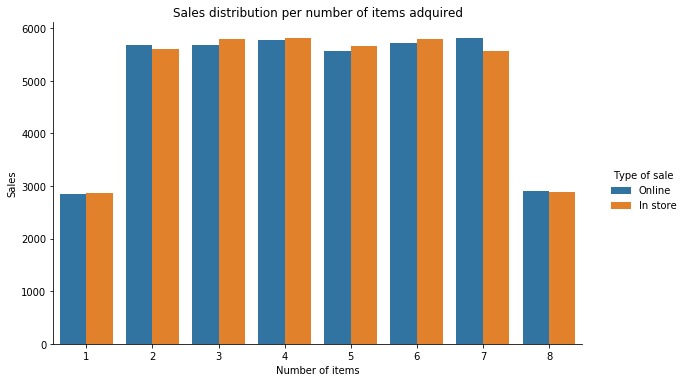

In [45]:
# Distribución de las ventas por número de items adquiridos en función de si han sido online o físicas
g = sns.catplot(x='items', data=df, hue='in-store', kind='count', aspect=1.75)
# Nombre de los ejes
g.set_xlabels('Number of items')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per number of items adquired')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)    
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.85)

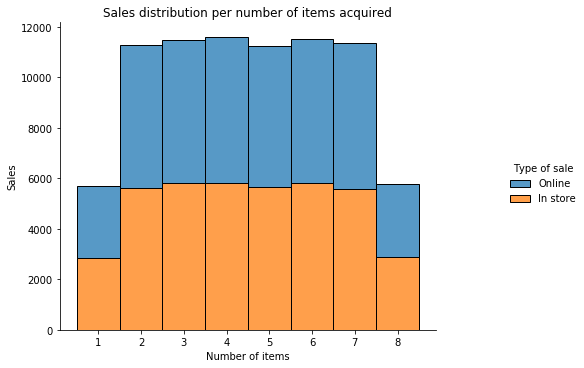

In [46]:
# Misma distribución que la gráfica anterior, pero representada en un diagrama de barras apiladas
g=sns.displot(data=df, x="items", hue="in-store", multiple="stack", discrete=True, aspect=1.5)
# Nombre de los ejes
g.set_xlabels('Number of items')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per number of items acquired')
# Título de la leyenda
g._legend.set_title('Type of sale')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['Online', 'In store']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.75)

Conclusión - El número de ítems adquiridos por venta es similar independientemente del canal utilizado

### Análisis de 'region' y su relación con el resto de variables

###### Distribución de ventas por región de USA (norte, sur, este y oeste)

In [47]:
# Distribución del número de ventas realizadas por región
df.groupby('region')['region'].count()

region
1    16000
2    20000
3    18000
4    26000
Name: region, dtype: int64

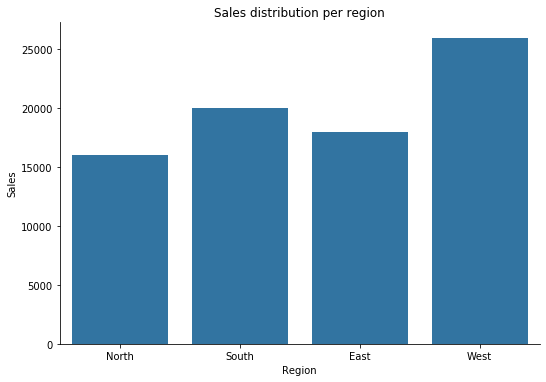

In [48]:
#Distribución de las ventas por región
g=sns.catplot(x='region', data=df, kind='count', aspect=1.5, color='#1f77b4')
# Marcas del eje X
g.set(xticks=[0,1,2,3])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per region')

Conclusión - Como ya se ha indicado anteriormente, las regiones ordenadas por ventas son: 
- Oeste (26.000)
- Sur (20.000)
- Este (18.000)
- Norte (16.000)

###### Distribución de ventas por región de USA (norte, sur, este y oeste) y beneficio por transacción

In [49]:
# Distribución de las ventas por región función de la cantidad gastada por transacción
a = df.groupby(['region', 'amount_text'])['amount_text'].count()
a.reindex(['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '>2500'], level='amount_text')

region  amount_text
1       <500            5844
        500-1000        6524
        1000-1500       1822
        1500-2000       1810
        2000-2500          0
        >2500              0
2       <500           20000
        500-1000           0
        1000-1500          0
        1500-2000          0
        2000-2500          0
        >2500              0
3       <500            6270
        500-1000        6916
        1000-1500       1210
        1500-2000       1240
        2000-2500       1190
        >2500           1174
4       <500            4706
        500-1000        5725
        1000-1500       5582
        1500-2000       5600
        2000-2500       2189
        >2500           2198
Name: amount_text, dtype: int64

###### Distribución de ventas por región de USA (norte, sur, este y oeste) y rango de beneficio por transacción 

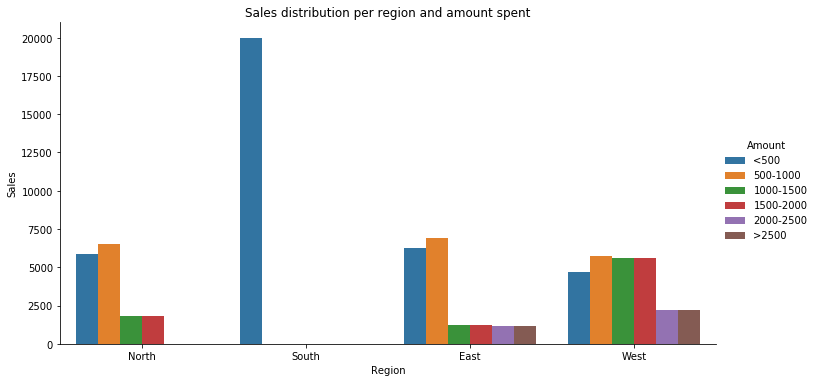

In [50]:
# Distribución de ventas por región y beneficio por transacción, utilizando los rangos discretizados anteriormente
g=sns.catplot(x='region', data=df, kind='count', hue='amount_text', order=[1,2,3,4], 
               hue_order=['<500','500-1000','1000-1500','1500-2000','2000-2500','>2500'], aspect=2)
# Marcas del eje X
g.set(xticks=[0,1,2,3])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per region and amount spent')
# Título de la leyenda
g._legend.set_title('Amount')

Conclusión 
- En la región Sur únicamente se realizan compras de menos de 500 y la cantidad es mucho mayor que en el del resto de regiones
- En la región Norte no se realizan compras de más de 2.500
- En la región Este se realizan pocas compras de más de 1.000

###### Distribución de ventas por región de USA (norte, sur, este y oeste), rango de beneficio por transacción y canal de venta

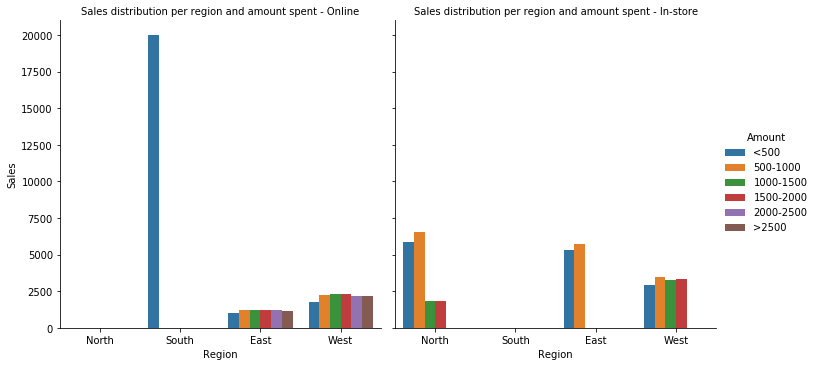

In [51]:
# Para este caso concreto, pasamos los 0 de la columna 'in-store' a "Online" y los 1 a "In-store"
def instore_text(user):
    if user==0:
        return "Online"
    if user==1:
        return "In-store"

# Aplicamos la función para que los títulos de la gráfica sean diferentes en función del canal
df1=df
df1["in-store_text"] = df["in-store"].map(instore_text)

# Distribución de ventas por región y beneficio por transacción, utilizando los rangos discretizados anteriormente
g=sns.catplot(x='region', data=df1, kind='count', hue='amount_text', col='in-store_text', order=[1,2,3,4], 
               hue_order=['<500','500-1000','1000-1500','1500-2000','2000-2500','>2500'], aspect=1)
# Marcas del eje X
g.set(xticks=[0,1,2,3])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
#g.set(titles='Sales distribution per region','')
g.set_titles("Sales distribution per region and amount spent - {col_name}")
# Título de la leyenda
g._legend.set_title('Amount')

Conclusión
- Como ya se había indicado antes, la región Norte solo tiene compras físicas y la región Sur solo tiene compras Online
- En la región Sur únicamente se realizan compras online de menos de 500, pero muchas más que en el resto de regiones
- Las compras más caras (más de 2.000) únicamente se realizan de forma Online en las regiones Este y Oeste

###### Distribución de ventas por región de USA (norte, sur, este y oeste) y beneficio total obtenido

In [52]:
# Taba dinámica agrupada por región y beneficio obtenido
a=df.pivot_table('amount', 'region', aggfunc=np.sum, margins=False)
a.astype('int')
# Ya que salen valores por millones, dividimos entre 1M y redondeamos a 2 decimales para expresar los beneficios
a=round(a/1000000,2)
a

,amount
region,
1,11.92
2,5.04
3,16.52
4,33.39


Conclusión
- La region más rentable por beneficio es la Oeste, duplicando a la siguiente (Este), que está ligeramente por encmia de la región Norte
- La región con menos beneficio es la Sur

###### Distribución de ventas por región de USA (norte, sur, este y oeste), beneficio total obtenido y canal (online o físico)

In [53]:
# Taba dinámica agrupada por región y beneficio obtenido en función del canal utilizado
a=df.pivot_table('amount', 'region','in-store', aggfunc=np.sum, margins=False)
a=round(a/1000000,2)
a

in-store,0,1
region,,
1,NaN,11.92
2,5.04,NaN
3,10.79,5.73
4,20.07,13.32


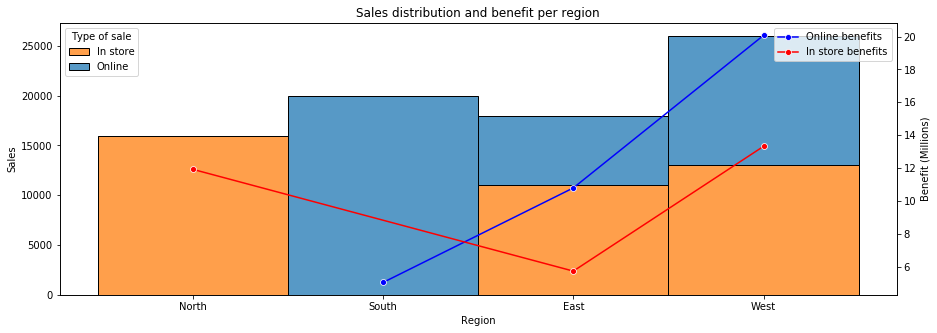

In [54]:
# Datos de la tabla dinámica anterior representados en un gráfico combinado
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Histograma por region y canal de venta
g=sns.histplot(data=df, x="region", hue="in-store", multiple="stack", discrete=True, binwidth=1, ax=ax1)
g.set(xticks=[1,2,3,4])
g.set_xticklabels(['North','South','East','West'])
# Título de la gráfica
g.set(title='Sales distribution and benefit per region')
# Nombre de los ejes
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Benefit (Millions)')

# Título y etiquetas de la leyenda
ax1.legend(labels=['In store','Online'], title="Type of sale")

# Tabla dinámica con los beneficios por región y canal online
a = df[df['in-store'] == 0].pivot_table('amount', 'region', aggfunc=np.sum, margins=False)
a.astype('int')
a=round(a/1000000,2)

# Tabla dinámica con los beneficios por región y canal físico
b = df[df['in-store'] == 1].pivot_table('amount', 'region', aggfunc=np.sum, margins=False)
b.astype('int')
b=round(b/1000000,2)

# Líneas indicando el beneficio de cada región por tipo de canal

sns.lineplot(data=a['amount'], marker='o', color='blue', sort=False, ax=ax2, label="Online benefits")
#ax2.legend (labels=['Online benefits'], loc=1)
sns.lineplot(data=b['amount'], marker='o', color='red', sort=False, ax=ax2, label="In store benefits")
#ax2.legend (labels=['In store benefits'], loc="upper right")

Conclusión
- La región más rentable desde el punto de vista de ventas online es la Oeste (más beneficio sin tener el mayor número de ventas)
- La región más rentable desde el punto de vista de ventas físicas es también la Oeste (más beneficio sin tener el mayor número de ventas)
- La región Sur, pese a tener el mayor número de ventas online, es la menos rentable, ya que son muchas ventas pero de poco importe

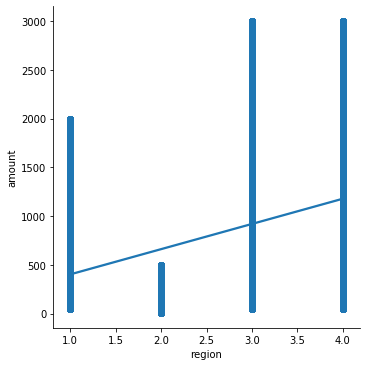

In [55]:
# Relación entre región y beneficio obtenido
sns.lmplot(x='region',y='amount', data=df)

Como se ha visto anteriormente con el coeficiente de correlación (0.4), parece que las compras tienden a aportar mayor beneficio según la región cambia de Norte (1) a Sur (2), Este (3) y Oeste (4).

###### Distribución de ventas por región de USA (norte, sur, este y oeste) y rango de edad

In [56]:
# Distribución de las ventas por región y rango de edad
a = df.groupby(['region', 'age_text'])['age_text'].count()
a.reindex(['<35', '35-50', '50-65', '>65'], level='age_text')

region  age_text
1       <35          4913
        35-50        6363
        50-65        3761
        >65           963
2       <35          2314
        35-50        5844
        50-65        6028
        >65          5814
3       <35          4849
        35-50        6479
        50-65        5474
        >65          1198
4       <35         10378
        35-50       11037
        50-65        4585
        >65             0
Name: age_text, dtype: int64

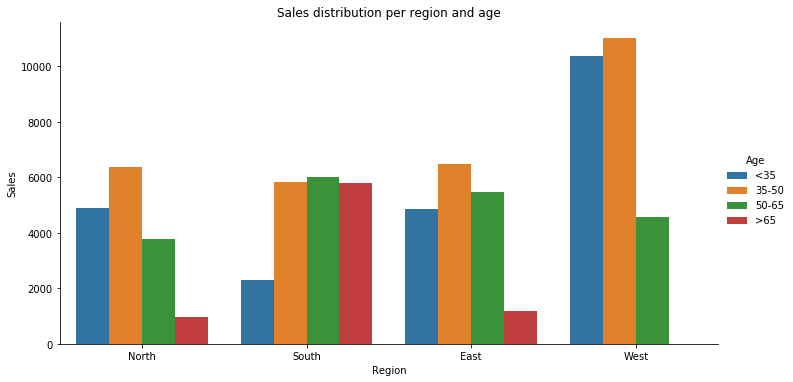

In [57]:
# Distribución de ventas por región y edad, utilizando los rangos de edad discretizados anteriormente
g=sns.catplot(x='region', data=df, kind='count', hue='age_text', order=[1,2,3,4], 
            hue_order=['<35','35-50','50-65','>65'], aspect=2)

# Marcas del eje X
g.set(xticks=[0,1,2,3])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per region and age')
# Título de la leyenda
g._legend.set_title('Age')

Conclusión
- La región Oeste tiene el mayor número de ventas a usuarios de menos de 50 años
- En la región Oeste no se realizan ventas a usuarios de más de 65 años
- La región Sur es en la que compran los usuarios más mayores

###### Distribución de ventas por región de USA (norte, sur, este y oeste), rango de edad y canal de venta

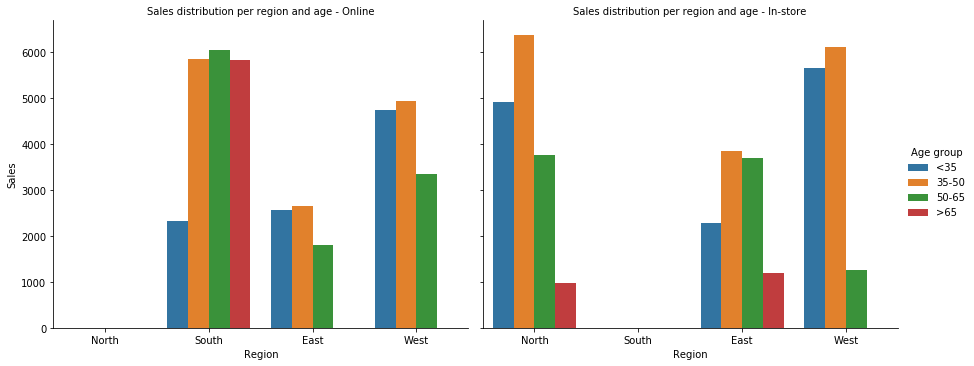

In [58]:
# Para este caso concreto, pasamos los 0 de la columna 'in-store' a "Online" y los 1 a "In-store"
def instore_text(user):
    if user==0:
        return "Online"
    if user==1:
        return "In-store"

# Aplicamos la función para que los títulos de la gráfica sean diferentes en función del canal
df1=df
df1["in-store_text"] = df["in-store"].map(instore_text)

# Misma distribución que la anterior, pero distinguiendo entre canal de venta
g=sns.catplot(x='region', data=df1, kind='count', hue='age_text', col='in-store_text', order=[1,2,3,4], 
               hue_order=['<35','35-50','50-65','>65'], aspect=1.25, height=5)

# Marcas del eje X
g.set(xticks=[0,1,2,3])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
#g.set(titles='Sales distribution per region','')
g.set_titles("Sales distribution per region and age - {col_name}")
# Título de la leyenda
g._legend.set_title('Age group')

Conclusión
- Los mayores de 65 años únicamente realizan compras online en la región Sur y compras físicas en las regiones Norte y Este
- El resto de rangos de edad realizan compras de todo tipo en todas las regiones (salvo compras online en la región Norte y físicas en la región Sur)

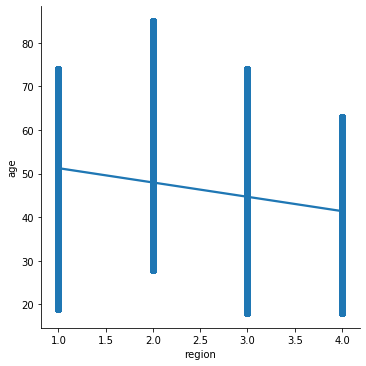

In [59]:
# Relación entre región y edad
sns.lmplot(x='region',y='age', data=df)

Como se ha visto anteriormente con el coeficiente de correlación (-0.23), parece que las compras tienden a realizarse por gente más joven según la región cambia de Norte (1) a Sur (2), Este (3) y Oeste (4).

###### Distribución de ventas por región de USA (norte, sur, este y oeste) y número de items adquiridos

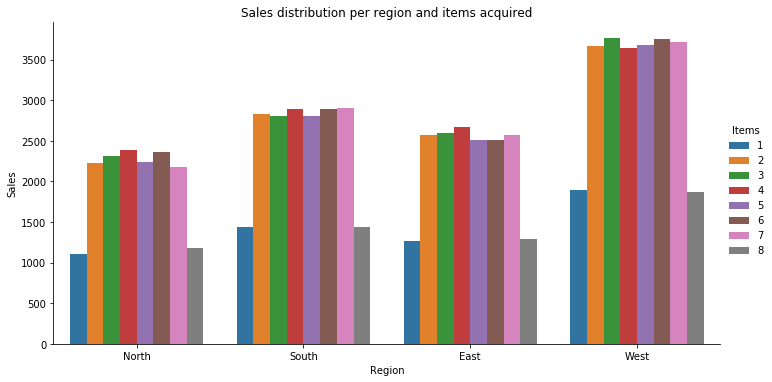

In [60]:
# Distribución de ventas por región y número de items adquiridos, utilizando los rangos de edad discretizados anteriormente
g=sns.catplot(x='region', data=df, kind='count', hue='items', aspect=2)

# Marcas del eje X
g.set(xticks=[0,1,2,3])
g.set_xticklabels(['North','South','East','West'])
# Nombre de los ejes
g.set_xlabels('Region')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per region and items acquired')
# Título de la leyenda
g._legend.set_title('Items')

Conclusión - Poca correlación entre variables, ya que el número de items vendidos se distribuye por región de forma aproximadamente uniforme

### Análisis de 'age' y su relación con el resto de variables

###### Distribución de ventas por edad

[Text(0, 0.5, 'Sales'), Text(0.5, 0, 'Age')]

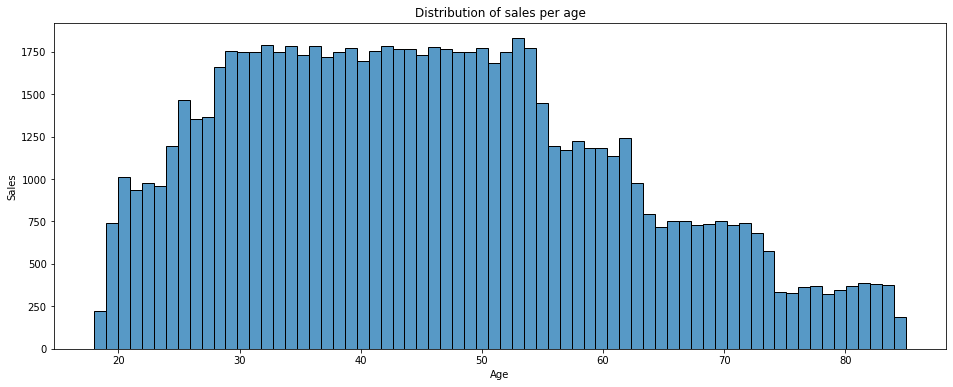

In [61]:
# Distribución de ventas realizadas según la edad del comprador
plt.figure(figsize=(16, 6))
g = sns.histplot(df['age'], bins=68)
g.set_title("Distribution of sales per age")
# Nombre de los ejes
g.set(xlabel="Age", ylabel = "Sales")

Conclusión - El mayor número de ventas se realiza entre usuarios de aproximadamente 30 y 55 años

###### Distribución de ventas por edad y región

In [62]:
# Edad media para cada región
a = np.round(df.pivot_table('age', 'region', aggfunc=np.mean, margins=False),0)
a.astype('int')

,age
region,
1,44
2,57
3,46
4,39


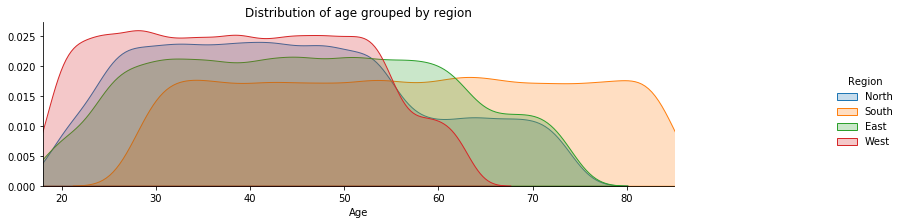

In [63]:
# Distribución de ventas realizadas según la edad del comprador y la región en la que se ha realizado
g = sns.FacetGrid(df, hue='region', aspect=4)
g.map(sns.kdeplot, 'age', shade=True)
g.set(xlim=(df['age'].min(),df['age'].max()))
g.set(title='Distribution of age grouped by region')
g.add_legend()
# Nombre de los ejes
g.set(xlabel="Age")
# Título de la leyenda
g._legend.set_title('Region')
# Etiquetas de la leyenda (sustituir 'in-store'=0 por Online y 'in-store'= 1 por In store)
new_labels = ['North','South','East','West']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# Mover la leyenda para que no pise al gráfico
g.fig.subplots_adjust(right=0.75)

Conclusión
- Los usuarios más jovenes realizan las compras en su mayoría en la región Oeste (como se ha comprobado anteriormente, la más rentable)
- Los usuarios más mayores únicamente realizan compras en la región Sur (como se ha comprobado anteriormente, la menos rentable)

###### Distribución de ventas según el beneficio total obtenido por edad

[Text(0, 0.5, 'Amount')]

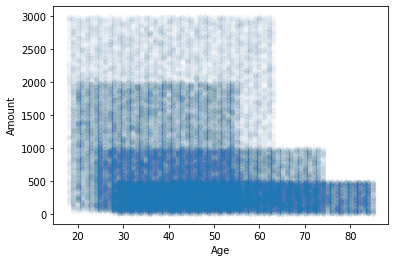

In [64]:
# Distribución de ventas realizadas según el beneficio obtenido, utilizando "alpha" para identificar los rangos más comunes
g=df.plot.scatter(x="age",y="amount", alpha=0.01)
# Nombre de los ejes
g.set(xlabel="Age")
g.set(ylabel="Amount")

Lo más comun son compras de menos de 500 realizadas por personas de entre 30 y 70 años

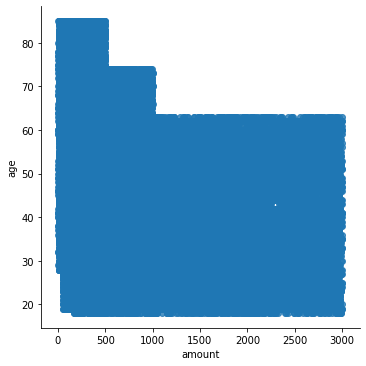

In [65]:
# Relación entre región y edad
sns.lmplot(x='amount',y='age', data=df)

Como se ha visto anteriormente con el coeficiente de correlación (-0.28), parece que las compras más caras tienden a realizarse por gente más joven

###### Distribución de ventas según el beneficio total obtenido por edad y canal de venta

Text(0.5, 1.0, 'Distribution of sales per age, amount and channel')

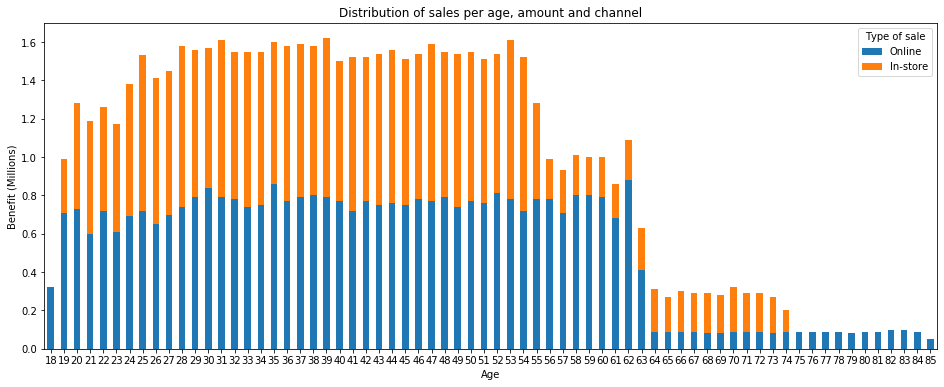

In [66]:
# Beneficio total obtenido por cada edad
a=df.pivot_table('amount', 'age', 'in-store',aggfunc=np.sum, margins=False, fill_value=0)
a=a.astype('int')
a=round(a/1000000,2)
ax=a.plot.bar(stacked=True,figsize=(16,6),rot=0)
# Leyenda
ax.legend(["Online", "In-store"], title="Type of sale");
# Título ejes
ax.set_xlabel("Age")
ax.set_ylabel("Benefit (Millions)")
# Título gráfica
ax.set_title("Distribution of sales per age, amount and channel")

Conclusión - Las compras que dan más beneficio son las realizadas por gente más joven (menos de 50 años), independientemente del canal

###### Distribución de ventas según el beneficio total obtenido por edad y canal

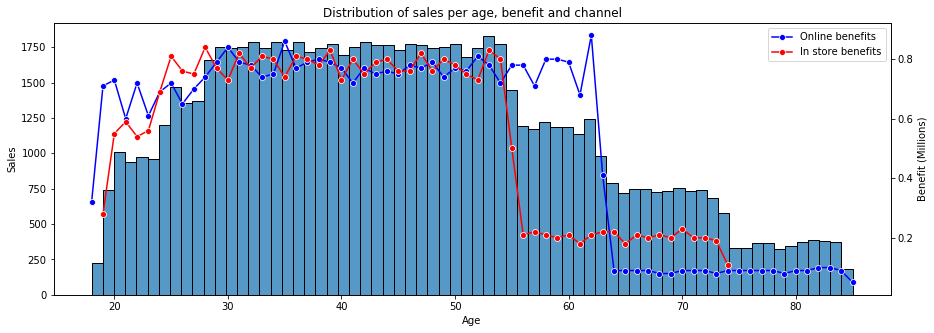

<Figure size 1152x432 with 0 Axes>

In [67]:
# Datos de la gráfica anterior representados en un gráfico combinado y añadiendo el número de ventas
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


# Distribución de las ventas por edad, canal y beneficio total obtenido
plt.figure(figsize=(16, 6))
g = sns.histplot(df['age'], bins=68, ax=ax1)
# Título ejes
g.set_xlabel("Age")
g.set_ylabel("Sales")
ax2.set_ylabel("Benefit (Millions)")
# Título gráfica
g.set_title("Distribution of sales per age, benefit and channel")

# Tabla dinámica con los beneficios por región y canal online
a = df[df['in-store'] == 0].pivot_table('amount', 'age', aggfunc=np.sum, margins=False)
a.astype('int')
a=round(a/1000000,2)

# Tabla dinámica con los beneficios por región y canal físico
b = df[df['in-store'] == 1].pivot_table('amount', 'age', aggfunc=np.sum, margins=False)
b.astype('int')
b=round(b/1000000,2)

# Líneas indicando el beneficio de cada región por tipo de canal
sns.lineplot(data=a['amount'], marker='o', color='blue', sort=False, ax=ax2, label="Online benefits")
sns.lineplot(data=b['amount'], marker='o', color='red', sort=False, ax=ax2, label="In store benefits")


Conclusión
- La gente joven hace más gasto por compra, ya que se obtiene bastante beneficio con un número bajo de compras
- La gente de edades en 25-55 es la que aporta mayor beneficio, pero realizando un mayor número de compras 
- A partir de 65 años se gasta menos por compra
- Las ventas físicas decrecen aproximadamente a partir de los 55 años, y las online aproximadamente a partir de los 65

###### Distribución de ventas según el beneficio total obtenido por rango de edad y por canal

In [68]:
# Taba dinámica agrupada por rango de edad y beneficio obtenido en función del canal utilizado
a=df.pivot_table('amount', 'age_text','in-store', aggfunc=np.sum, margins=False)
a=round(a/1000000,2)
a

in-store,0,1
age_text,,
<35,11.89,11.07
35-50,13.14,13.26
50-65,9.40,5.52
>65,1.47,1.12


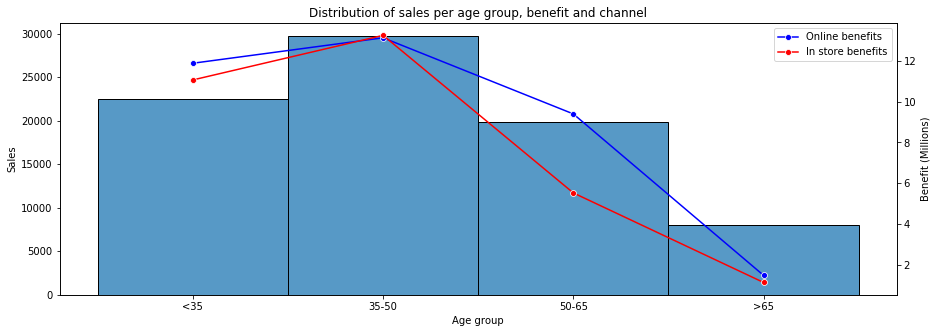

<Figure size 1152x432 with 0 Axes>

In [69]:
# Datos de la tabla dinámica anterior representados en un gráfico combinado
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Ordena el dataframe según los valores de age_text, para que salgan así representados en el eje X de la gráfica
df['age_text'] = pd.Categorical(df['age_text'],categories=['<35', '35-50', '50-65', '>65'],ordered=True)
df = df.sort_values('age_text',ascending=False)

# Distribución de las ventas por edad en función de si han sido online o físicas
plt.figure(figsize=(16, 6))
g = sns.histplot(df['age_text'], bins=68, ax=ax1)
# Título ejes
g.set_xlabel("Age group")
g.set_ylabel("Sales")
ax2.set_ylabel("Benefit (Millions)")
# Título gráfica
g.set_title("Distribution of sales per age group, benefit and channel")

# Tabla dinámica con los beneficios por región y canal online
a = df[df['in-store'] == 0].pivot_table('amount', 'age_text', aggfunc=np.sum, margins=False)
a.astype('int')
a=round(a/1000000,2)

# Tabla dinámica con los beneficios por región y canal físico
b = df[df['in-store'] == 1].pivot_table('amount', 'age_text', aggfunc=np.sum, margins=False)
b.astype('int')
b=round(b/1000000,2)

# Líneas indicando el beneficio de cada región por tipo de canal
sns.lineplot(data=a['amount'], marker='o', color='blue', sort=False, ax=ax2, label="Online benefits")
sns.lineplot(data=b['amount'], marker='o', color='red', sort=False, ax=ax2, label="In store benefits")

Conclusión
- Los menores de 35 años son uno de los más rentables, ya que aportan bastante beneficio realizando menor número de compras 
- En el resto de casos, el beneficio obtenido decrece según aumenta la edad , ya que disminuye el número de compras

###### Distribución de ventas según el beneficio medio obtenido por edad

Text(0.5, 1.0, 'Distribution of average benefit per age')

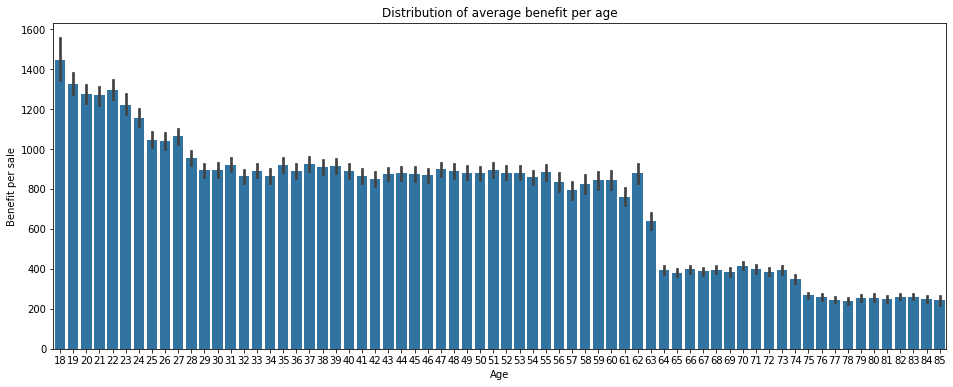

In [70]:
# Beneficio medio por venta obtenido por cada edad
plt.figure(figsize=(16, 6))
g = sns.barplot(data=df, x='age', y='amount', color='#1f77b4')
g.set_title("Distribution of sales per ages")
# Título ejes
g.set_xlabel("Age")
g.set_ylabel("Benefit per sale")
# Título gráfica
g.set_title("Distribution of average benefit per age")

Conclusión - El valor medio por venta disminuye según aumenta la edad

###### Distribución de ventas por edad y número de items

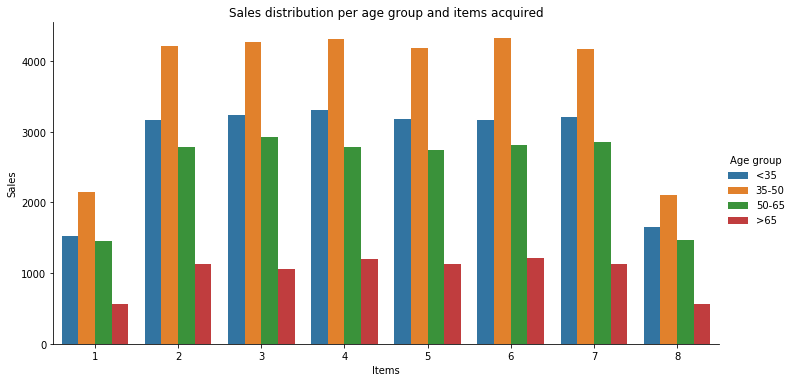

In [71]:
# Distribución de ventas por rangos de edad y número de items adquiridos
g=sns.catplot(x='items', data=df, kind='count', hue='age_text', aspect=2)
# Nombre de los ejes
g.set_xlabels('Items')
g.set_ylabels('Sales')
# Título de la gráfica
g.set(title='Sales distribution per age group and items acquired')
# Título de la leyenda
g._legend.set_title('Age group')

Conclusión - El número de items adquiridos es independiente a la edad de los usuarios que realizan la compra

### Análisis de 'amount' y su relación con el resto de variables

###### Distribución de ventas por beneficio obtenido

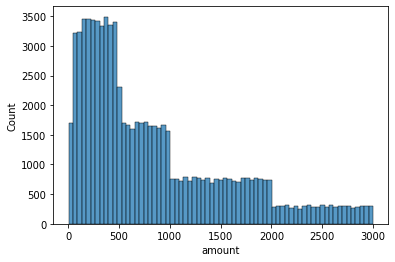

In [72]:
# Distribución de las ventas por cantidad gastada (cantidad por transacción)
g = sns.histplot(df['amount'])

Conclusión - Las compras más comunes son las de menos importe y las más comunes las de mayor importe

###### Distribución del beneficio total obtenido en función del rango de beneficio por transacción y del canal de venta

In [73]:
# Beneficio total obtenido por canal y por rango de cantidad gastada por venta
a=df.pivot_table('amount', 'amount_text', 'in-store',aggfunc=np.sum, margins=False, fill_value=0)
a=a.astype('int')
a=round(a/1000000,2)
a

in-store,0,1
amount_text,,
<500,5.86,3.86
500-1000,2.59,11.77
1000-1500,4.39,6.37
1500-2000,6.18,8.97
2000-2500,7.61,0.00
>2500,9.27,0.00


Text(0.5, 1.0, 'Distribution of benefit per benefit/sale and channel')

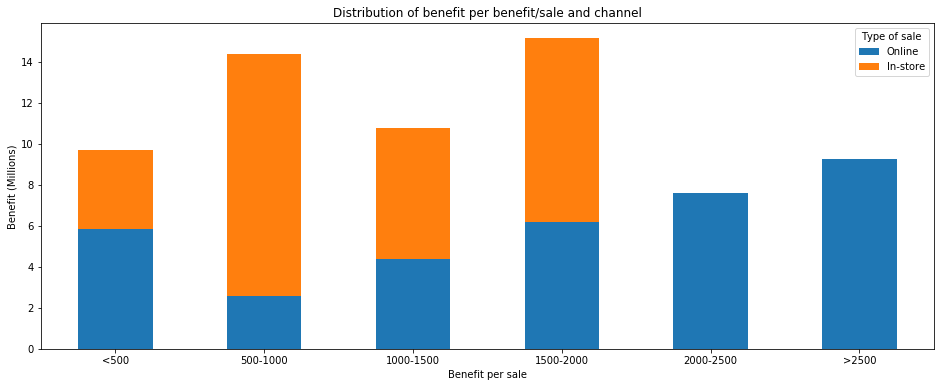

In [74]:
# Beneficio total obtenido por canal y por rango de cantidad gastada por venta
a=df.pivot_table('amount', 'amount_text', 'in-store',aggfunc=np.sum, margins=False, fill_value=0)
a=a.astype('int')
a=round(a/1000000,2)
ax=a.plot.bar(stacked=True,figsize=(16,6),rot=0)
# Leyenda
ax.legend(["Online", "In-store"], title="Type of sale");
# Título ejes
ax.set_xlabel("Benefit per sale")
ax.set_ylabel("Benefit (Millions)")
# Título gráfica
ax.set_title("Distribution of benefit per benefit/sale and channel")

Conclusión - Las compras que aportan más beneficio son las que tienen un valor por compra de entre 500-1.000 y 1.500-2.000

###### Distribución del beneficio total obtenido por región y por rango de edad

Text(0.5, 1.0, 'Distribution of benefit per region and age group')

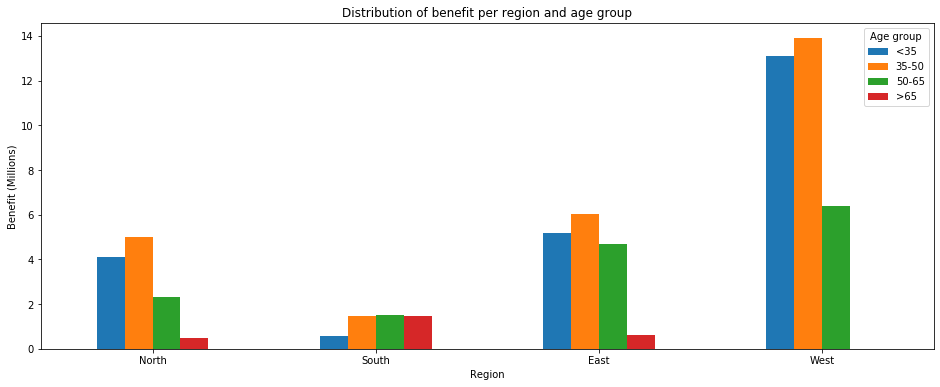

In [75]:
# Beneficio total obtenido por cada región y rango de edad
a=df.pivot_table('amount', 'region', 'age_text',aggfunc=np.sum, margins=False, fill_value=0)
a=a.astype('int')
a=round(a/1000000,2)
ax=a.plot.bar(figsize=(16,6),rot=0)

# Marcas del eje X
ax.set(xticks=[0,1,2,3])
ax.set_xticklabels(['North','South','East','West'])
# Leyenda
ax.legend(title="Age group");
# Título ejes
ax.set_xlabel("Region")
ax.set_ylabel("Benefit (Millions)")
# Título gráfica
ax.set_title("Distribution of benefit per region and age group")

Conclusión 
- La región que más beneficio aporta es la Oeste, en concreto los usuarios más jovenes (menores de 35 años o entre 35-50)
- Los usuarios más mayores (más de 65 años) no realizan compras en la región Oeste

###### Distribución del beneficio obtenido en función del número de items adquiridos y por canal de venta

Text(0.5, 1.0, 'Distribution of benefit per items acquired and channel')

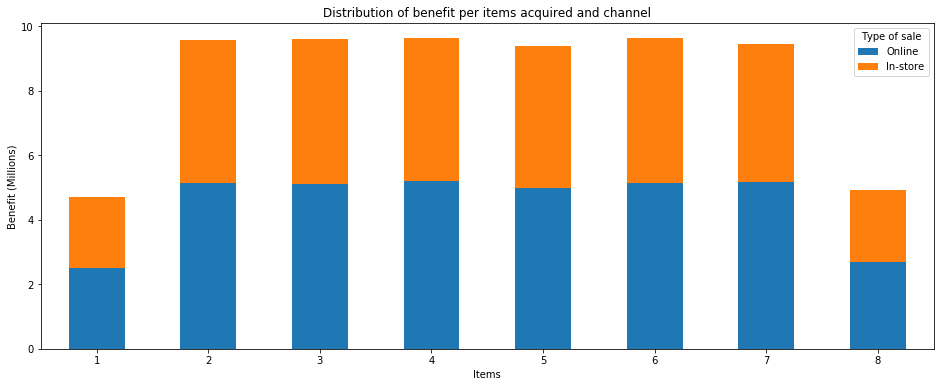

In [76]:
# Beneficio total obtenido por canal y número de items adquiridos
a=df.pivot_table('amount', 'items', 'in-store',aggfunc=np.sum, margins=False, fill_value=0)
a=a.astype('int')
a=round(a/1000000,2)
ax=a.plot.bar(stacked=True,figsize=(16,6),rot=0)

# Leyenda
ax.legend(["Online", "In-store"], title="Type of sale");
# Título ejes
ax.set_xlabel("Items")
ax.set_ylabel("Benefit (Millions)")
# Título gráfica
ax.set_title("Distribution of benefit per items acquired and channel")

Conclusión - El número de items adquiridos es independiente al beneficio que aportan las compras

###### Distribución del beneficio medio obtenido en función del número de items adquiridos

Text(0.5, 1.0, 'Distribution of benefit/sale and number of items acquired')

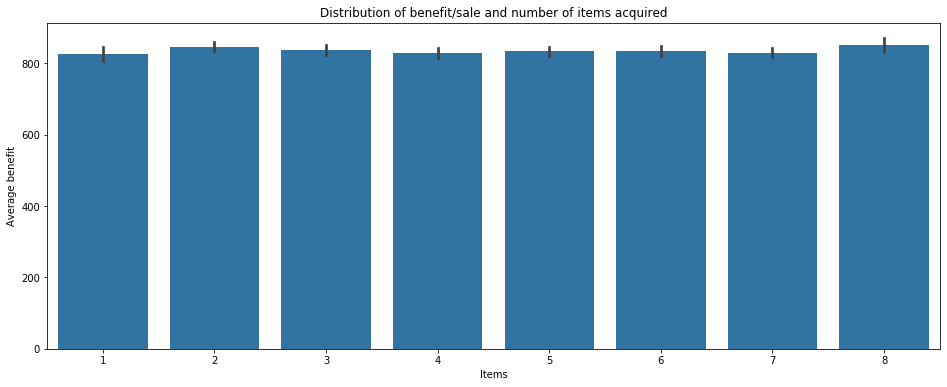

In [77]:
# Beneficio medio por venta obtenido por cada número de items
plt.figure(figsize=(16, 6))
g = sns.barplot(data=df, x='items', y='amount', color='#1f77b4')
g.set_title("Distribution of average benefit per number of items acquired")

# Título ejes
g.set_xlabel("Items")
g.set_ylabel("Average benefit")
# Título gráfica
g.set_title("Distribution of benefit/sale and number of items acquired")

Conclusión - El beneficio medio obtenido es el mismo independientemente del número de items adquirido, lo que implica que el precio medio por item disminuye según aumenta el número de items adquiridos (es decir, de media, las compras de 1 item aportan aproximadamente el mismo beneficio que las compras de 2,3,4,5,6,7 y 8 items)

###### Distribución del beneficio total obtenido por número de items adquiridos y por rango de edad

Text(0.5, 1.0, 'Distribution of benefit per items acquired and benefit/sale')

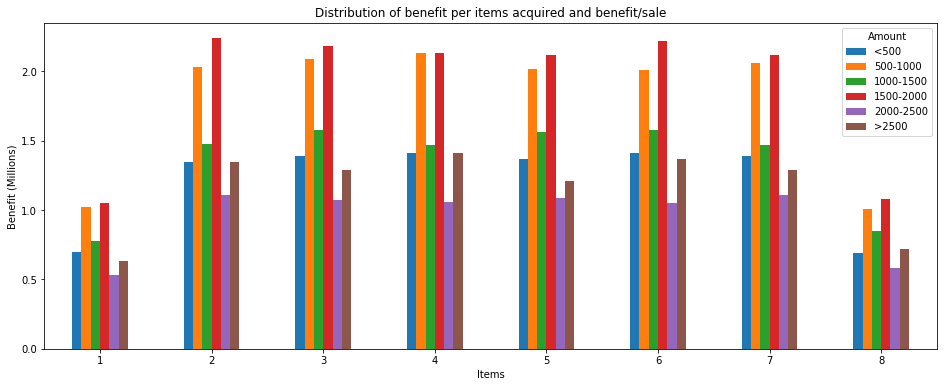

In [78]:
# Beneficio total obtenido por cada edad
a=df.pivot_table('amount', 'items', 'amount_text', aggfunc=np.sum, margins=False, fill_value=0)
a=a.astype('int')
a=round(a/1000000,2)
ax=a.plot.bar(figsize=(16,6),rot=0)

# Leyenda
ax.legend(title="Amount");
# Título ejes
ax.set_xlabel("Items")
ax.set_ylabel("Benefit (Millions)")
# Título gráfica
ax.set_title("Distribution of benefit per items acquired and benefit/sale")

Conclusión - El número de items adquiridos es independiente al beneficio y rando de edad de los usuarios

# 5. Modeling

## Introducción

### Importar librerías

In [79]:
# Importa las librerías que se necesitarán para el análisis de los diferentes modelos
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, make_scorer, mean_squared_error

# Clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Optimización de parámetros
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

### Leer el dataset

In [80]:
# Vuelve a cargar el dataset y guarda los datos del fichero CSV en la variable 'df' de tipo "dataframe"
df = pd.read_csv('Demographic_Data.csv')

### Valores duplicados

In [81]:
# Aunque podría ser el mismo usuario realizando la misma compra varias veces, eliminamos para evitar errores con los modelos
df = df.drop_duplicates()

## Análisis demográfico - Predecir 'in-store' a partir de 'age' y del resto de variables

Para este análisis, dado que se trata de clasificar si un usuario realiza una compra online o física, se van a comparar los algoritmos de clasificación Decision Tree, Random Forest y Gradient Boosting para intentar predecir 'in-store' en función de 'age' y del resto de variables.

El rendimiento de los modelos definidos se medirá basándonos en el valor de 'accuracy' que presenten.

### Comparativa de algoritmos de Clasificación mediante Cross Validation

In [82]:
# Función para poder realizar Cross Validation y comparar los 3 modelos con diferentes variables independientes
def crossValidation(x,y):

    algos_Class = []
    algos_Class.append(('- Decision Tree Classifier:', DecisionTreeClassifier()))
    algos_Class.append(('- Random Forest Classifier:', RandomForestClassifier()))
    algos_Class.append(('- Gradient Boosting Classifier:', GradientBoostingClassifier()))
   
    # Validación cruzada para cada algoritmo
    results = []
    names = []
    for name, model in algos_Class:
        result = cross_val_score(model, x, y, cv = 5, scoring = 'accuracy')
        names.append(name)
        results.append(result)

    for i in range(len(names)):
        print(names[i],results[i].mean())

In [83]:
# Variable dependiente
y = df['in-store']

# Variables independientes
x = df['age']
x = x.values.reshape(-1,1)
print("Accuracy al predecir 'in-store' a partir de 'age':")
crossValidation(x,y)

# Variables independientes
x = df[['age','region']]
print("\nAccuracy al predecir 'in-store' a partir de 'age' y 'region':")
crossValidation(x,y)

# Variables independientes
x = df[['age','region','amount']]
print("\nAccuracy al predecir 'in-store' a partir de 'age', 'region' y 'amount':")
crossValidation(x,y)

# Variables independientes
x = df[['age','region','amount','items']]
print("\nAccuracy al predecir 'in-store' a partir de 'age', 'region', 'amount' y 'items':")
crossValidation(x,y)

Accuracy al predecir 'in-store' a partir de 'age':
- Decision Tree Classifier: 0.5916553067619829
- Random Forest Classifier: 0.5916553067619829
- Gradient Boosting Classifier: 0.5916553067619829

Accuracy al predecir 'in-store' a partir de 'age' y 'region':
- Decision Tree Classifier: 0.7922329941660157
- Random Forest Classifier: 0.7922329941660157
- Gradient Boosting Classifier: 0.7927456223230549

Accuracy al predecir 'in-store' a partir de 'age', 'region' y 'amount':
- Decision Tree Classifier: 0.8474599495450607
- Random Forest Classifier: 0.8500606372287038
- Gradient Boosting Classifier: 0.8871453608947719

Accuracy al predecir 'in-store' a partir de 'age', 'region', 'amount' y 'items':
- Decision Tree Classifier: 0.845559452538971
- Random Forest Classifier: 0.8608634723544906
- Gradient Boosting Classifier: 0.8871328577689905


Conclusión

* No se puede predecir de forma precisa (0,59 de accuracy) si una compra será online o física ('in-store') teniendo en cuenta únicamente la edad del comprador ('age'), lo que tiene sentido si recordamos que el coeficiente de correlación entre 'age' e 'in-store' no era muy alto (-0.178)

* El mejor modelo para predecir 'in-store' parece ser Gradient Boosting Classifier utilizando al resto de variables como independientes

* Parece que la variable 'items' no influye mucho en el modelo

A continuación, intentaremos optimizar todos los clasificadores para predecir 'in-store' en función del resto de variables

### Análisis individual de cada algoritmo de Clasificación con Test/Train y Cross Validation

#### Decision Tree Classifier

In [84]:
# Función para poder aplicar el modelo Decision Tree con diferentes entradas
def DecisionTree(x,y):

    # Separa en Train/Test 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

    # Clasificación (entrenar al modelo con datos de train)
    algo = DecisionTreeClassifier()
    model = algo.fit(x_train, y_train)
 
    # Aplica el modelo a los datos de test
    preds = model.predict(x_test)
    print("\n- Train/Test split method report:\n")
    print(classification_report(y_test, preds))
    score_pred = metrics.accuracy_score(y_test, preds)
    print("- Train/Test split Accuracy:", score_pred)

    # Cross Validation
    scores = cross_val_score(algo, x_train, y_train, cv = 5, scoring = "accuracy")
    print("\n- Cross Validation Accuracy:", scores.mean())

In [85]:
# Ejecuta la función anterior para 'in-store' como variable dependiente y va añadiendo variables independientes al set X

# Variable dependiente
y = df['in-store']

# Variables independientes
x = df['age']
x = x.values.reshape(-1,1)
print('\033[1m'+"Predecir 'in-store' a partir de 'age' mediante Decision Tree"+'\033[0m')
DecisionTree(x,y)

# Variables independientes
x = df[['age','region']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age' y 'region' mediante Decision Tree"+'\033[0m')
DecisionTree(x,y)

# Variables independientes
x = df[['age','region','amount']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age', 'region' y 'amount' mediante Decision Tree"+'\033[0m')
DecisionTree(x,y)

# Variables independientes
x = df[['age','region','amount','items']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age', 'region', 'amount' y 'items' mediante Decision Tree"+'\033[0m')
DecisionTree(x,y)

Predecir 'in-store' a partir de 'age' mediante Decision Tree

- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.71      0.31      0.43     11997
           1       0.56      0.87      0.68     11997

    accuracy                           0.59     23994
   macro avg       0.63      0.59      0.56     23994
weighted avg       0.63      0.59      0.56     23994

- Train/Test split Accuracy: 0.5918562974076853

- Cross Validation Accuracy: 0.5913012414039475


Predecir 'in-store' a partir de 'age' y 'region' mediante Decision Tree

- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     11997
           1       0.71      0.99      0.83     11997

    accuracy                           0.79     23994
   macro avg       0.85      0.79      0.78     23994
weighted avg       0.85      0.79      0.78     23994

- Train/Test split Accuracy: 0.79240643494

Conclusión - Como se había comprobado anteriormente, el mejor modelo para predecir 'in-store' es el que utiliza al resto de variables como independientes, aunque la variable 'items' parece no afectar en los resultados, por lo que no la tenemos en cuenta

##### Optimización del modelo basado en Decision Tree Classifier

In [86]:
# Posibles valores de los parámetros a probar para intentar optimizar el modelo
tree_param = [
    {
    'criterion': ['entropy', 'gini'],
    'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
    {'min_samples_leaf': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
]

# Variables independientes
x = df[['age','region','amount']]

# Variable dependiente
y = df['in-store']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

# Comprueba los mejores parámetros a utilizar en el modelo
DTCalgoCV = GridSearchCV(DecisionTreeClassifier(), tree_param, cv = 10)
DTCmodelCV = DTCalgoCV.fit(x_train,y_train)

print("Los mejores valores obtenidos para optimizar el modelo son:\n\n", DTCmodelCV.best_params_)
print("\nPor tanto, el mejor clasificador posible es:\n\n", DTCmodelCV.best_estimator_)

Los mejores valores obtenidos para optimizar el modelo son:

 {'criterion': 'entropy', 'max_depth': 11}

Por tanto, el mejor clasificador posible es:

 DecisionTreeClassifier(criterion='entropy', max_depth=11)


In [87]:
# Clasificación (entrenar al mejor modelo obtenido con datos de train)
DTCalgo = DTCmodelCV.best_estimator_
DTCmodel = DTCalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
DTCpreds = DTCmodel.predict(x_test)

print("\nTrain/Test split method report:\n")
print(classification_report(y_test, DTCpreds))
DTCscore_pred = metrics.accuracy_score(y_test, DTCpreds)
print("Train/Test split Accuracy:", DTCscore_pred)


Train/Test split method report:

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     11997
           1       0.82      0.99      0.90     11997

    accuracy                           0.89     23994
   macro avg       0.90      0.89      0.89     23994
weighted avg       0.90      0.89      0.89     23994

Train/Test split Accuracy: 0.8865966491622905


Conclusión - La optimización de parámetros no ha conseguido aumentar mucho más el 'accuracy'

#### Random Forest Classifier

In [88]:
# Define la función para poder aplicar el modelo Random Forest con diferentes entradas
def RandomForest(x,y):

    # Separa en Train/Test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify=y)

    # Clasificación (entrenar al modelo con datos de train)
    algo = RandomForestClassifier()
    model = algo.fit(x_train, y_train)
 
    # Aplica el modelo a los datos de test
    preds = model.predict(x_test)
    print("\n- Train/Test split method report:\n")
    print(classification_report(y_test, preds))
    score_pred = metrics.accuracy_score(y_test, preds)
    print("- Train/Test split Accuracy:", score_pred)

    # Cross validation
    scores = cross_val_score(algo, x_train, y_train, cv=5, scoring="accuracy")
    print("\n- Cross Validation Accuracy:", scores.mean())

In [89]:
# Ejecuta la función anterior para 'in-store' como variable dependiente y va añadiendo variables independientes al set X

# Variable independiente
y = df['in-store']

# Variables independientes
x = df['age']
x = x.values.reshape(-1,1)
print('\033[1m'+"Predecir 'in-store' a partir de 'age' mediante Random Forest"+'\033[0m')
RandomForest(x,y)

# Variables independientes
x = df[['age','region']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age' y 'region' mediante Random Forest"+'\033[0m')
RandomForest(x,y)

# Variables independientes
x = df[['age','region','amount']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age', 'region' y 'amount' mediante Random Forest"+'\033[0m')
RandomForest(x,y)

# Variables independientes
x = df[['age','region','amount','items']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age', 'region', 'amount' y 'items' mediante Random Forest"+'\033[0m')
RandomForest(x,y)

Predecir 'in-store' a partir de 'age' mediante Random Forest

- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.72      0.30      0.42     11997
           1       0.56      0.88      0.68     11997

    accuracy                           0.59     23994
   macro avg       0.64      0.59      0.55     23994
weighted avg       0.64      0.59      0.55     23994

- Train/Test split Accuracy: 0.5916062348920563

- Cross Validation Accuracy: 0.5913012414039475


Predecir 'in-store' a partir de 'age' y 'region' mediante Random Forest

- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     11997
           1       0.71      0.99      0.83     11997

    accuracy                           0.79     23994
   macro avg       0.85      0.79      0.78     23994
weighted avg       0.85      0.79      0.78     23994

- Train/Test split Accuracy: 0.79240643494

Conclusión - Como se había comprobado anteriormente, el mejor modelo para predecir 'in-store' es el que utiliza al resto de variables como independientes, aunque la variable 'items' parece no afectar en los resultados, por lo que no la tenemos en cuenta

##### Optimización del modelo basado en Random Forest Classifier

In [90]:
# Posibles valores de los parámetros a probar para intentar optimizar el modelo
tree_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy']
}

# Variables independientes
x = df[['age','region','amount']]

# Variable dependiente
y = df['in-store']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

# Comprueba los mejores parámetros a utilizar en el modelo
RFCalgoCV = GridSearchCV(RandomForestClassifier(), tree_param, cv = 5)
RFCmodelCV = RFCalgoCV.fit(x_train,y_train)

print("Los mejores valores obtenidos para optimizar el modelo son:\n\n", RFCmodelCV.best_params_)
print("\nPor tanto, el mejor clasificador posible es:\n\n", RFCmodelCV.best_estimator_)

Los mejores valores obtenidos para optimizar el modelo son:

 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}

Por tanto, el mejor clasificador posible es:

 RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)


In [91]:
# Clasificación (entrenar al mejor modelo obtenido con datos de train)
RFCalgo = RFCmodelCV.best_estimator_
RFCmodel = RFCalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
RFCpreds = RFCmodel.predict(x_test)

print("\nTrain/Test split method report:\n")
print(classification_report(y_test, RFCpreds))
RFCscore_pred = metrics.accuracy_score(y_test, RFCpreds)
print("Train/Test split Accuracy:", RFCscore_pred)


Train/Test split method report:

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     11997
           1       0.82      1.00      0.90     11997

    accuracy                           0.89     23994
   macro avg       0.91      0.89      0.89     23994
weighted avg       0.91      0.89      0.89     23994

Train/Test split Accuracy: 0.8866800033341669


Conclusión - La optimización de parámetros no ha conseguido aumentar mucho más el 'accuracy'

#### Gradient Boosting Classifier

In [92]:
# Función para poder aplicar el modelo Boosting Classifier con diferentes entradas
def GradientBoosting(x,y):

    # Separa en Train/Test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

    # Clasificación (entrenar al modelo con datos de train)
    algo = GradientBoostingClassifier()
    model = algo.fit(x_train, y_train)
 
    # Aplica el modelo a los datos de test
    preds = model.predict(x_test)
    print("\n- Train/Test split method report:\n")
    print(classification_report(y_test, preds))
    score_pred = metrics.accuracy_score(y_test, preds)
    print("- Train/Test split Accuracy:", score_pred)

    # Cross Validation
    scores = cross_val_score(algo, x_train, y_train, cv = 5, scoring = "accuracy")
    print("\n- Cross Validation Accuracy:", scores.mean())

In [93]:
# Ejecuta la función anterior para 'in-store' como variable dependiente y va añadiendo variables independientes al set X

# Variable dependiente
y = df['in-store']

# Variables independientes
x = df['age']
x = x.values.reshape(-1,1)
print('\033[1m'+"Predecir 'in-store' a partir de 'age' mediante Gradient Boosting"+'\033[0m')
GradientBoosting(x,y)

# Variables independientes
x = df[['age','region']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age' y 'region' mediante Gradient Boosting"+'\033[0m')
GradientBoosting(x,y)

# Variables independientes
x = df[['age','region','amount']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age', 'region' y 'amount' mediante Gradient Boosting"+'\033[0m')
GradientBoosting(x,y)

# Variables independientes
x = df[['age','region','amount','items']]
print('\n\033[1m'+"\nPredecir 'in-store' a partir de 'age', 'region', 'amount' y 'items' mediante Gradient Boosting"+'\033[0m')
GradientBoosting(x,y)

Predecir 'in-store' a partir de 'age' mediante Gradient Boosting

- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.73      0.29      0.42     11997
           1       0.56      0.89      0.69     11997

    accuracy                           0.59     23994
   macro avg       0.65      0.59      0.55     23994
weighted avg       0.65      0.59      0.55     23994

- Train/Test split Accuracy: 0.5928148703842627

- Cross Validation Accuracy: 0.5916584799499865


Predecir 'in-store' a partir de 'age' y 'region' mediante Gradient Boosting

- Train/Test split method report:

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     11997
           1       0.71      0.99      0.83     11997

    accuracy                           0.79     23994
   macro avg       0.85      0.79      0.78     23994
weighted avg       0.85      0.79      0.78     23994

- Train/Test split Accuracy: 0.792

Conclusión - Como se había comprobado anteriormente, el mejor modelo para predecir 'in-store' es el que utiliza al resto de variables como independientes, aunque la variable 'items' parece no afectar en los resultados, por lo que no la tenemos en cuenta

##### Optimización del modelo basado en Gradient Boosting Classifier

In [94]:
# Posibles valores de los parámetros a probar para intentar optimizar el modelo
tree_param = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'max_depth'    : range(5,15),
                  'min_samples_split': range(5,10,1),
                  'loss': ['deviance', 'exponential'],
                 }

# Variables independientes
x = df[['age','region','amount']]

# Variable dependiente
y = df['in-store']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

# Comprueba los mejores parámetros a utilizar en el modelo con HalvingGridSearchCV para disminuir el tiempo de procesado
GBCalgoCV = HalvingGridSearchCV(GradientBoostingClassifier(), tree_param, cv = 5, factor = 2, resource = 'n_estimators', max_resources=30)
GBCmodelCV = GBCalgoCV.fit(x_train, y_train)

print("Los mejores valores obtenidos para optimizar el modelo son:\n\n", GBCmodelCV.best_params_)
print("\nPor tanto, el mejor clasificador posible es:\n\n", GBCmodelCV.best_estimator_)

Los mejores valores obtenidos para optimizar el modelo son:

 {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 11, 'min_samples_split': 9, 'subsample': 0.5, 'n_estimators': 16}

Por tanto, el mejor clasificador posible es:

 GradientBoostingClassifier(learning_rate=0.03, max_depth=11,
                           min_samples_split=9, n_estimators=16, subsample=0.5)


In [95]:
# Clasificación (entrenar al mejor modelo obtenido con datos de train)
GBCalgo = GBCmodelCV.best_estimator_
GBCmodel = GBCalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
GBCpreds = GBCmodel.predict(x_test)

print("\nTrain/Test split method report:\n")
print(classification_report(y_test, GBCpreds))
GBCscore_pred = metrics.accuracy_score(y_test, GBCpreds)
print("Train/Test split Accuracy:", GBCscore_pred)


Train/Test split method report:

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     11874
           1       0.82      1.00      0.90     12120

    accuracy                           0.89     23994
   macro avg       0.91      0.89      0.89     23994
weighted avg       0.91      0.89      0.89     23994

Train/Test split Accuracy: 0.8892223055763941


Conclusión - La optimización de parámetros no ha conseguido aumentar mucho más el 'accuracy'

#### Tabla resumen

In [96]:
# Crea una tabla resumen con los datos utilizados por cada modelo y sus resultados
dataC = {'Features': ['Age, Region, Amount', 'Age, Region, Amount', 'Age, Region, Amount'],
        'Target': ['In-store', 'In-store', 'In-store'],
        'Model': ['DT Classifier', 'RF Classifier', 'GB Classifier'],
        'Hyperparameters':[str(DTCmodelCV.best_params_), str(RFCmodelCV.best_params_), str(GBCmodelCV.best_params_)],
        'Accuracy':[DTCscore_pred, RFCscore_pred, GBCscore_pred]
       }
resultsC = pd.DataFrame(dataC)

# Formato de la tabla
resultsC = resultsC.style.hide_index().set_properties(
    **{'color': 'black !important',
       'background-color': 'white',
       'border': '1px black solid !important'}
).set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px black solid !important'),('background-color', '#D3D3D3'), ('text-align', 'center')]},
    {
        'selector': 'td',
        'props': [('text-align', 'center')]}
])

resultsC

Features,Target,Model,Hyperparameters,Accuracy
"Age, Region, Amount",In-store,DT Classifier,"{'criterion': 'entropy', 'max_depth': 11}",0.886597
"Age, Region, Amount",In-store,RF Classifier,"{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}",0.886680
"Age, Region, Amount",In-store,GB Classifier,"{'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 11, 'min_samples_split': 9, 'subsample': 0.5, 'n_estimators': 16}",0.889222


Conclusión - Se consigue un buen modelo (precisión de 0.89) utilizando las variables 'region', 'age' y 'amount' para predecir 'in-store'. En cuanto al tipo de clasificador, tanto Decision Tree como Random Forest o Gradient Boosting ofrecen un 'accuracy' similar.

## Análisis demográfico - Predecir 'age' a partir del resto de variables

Para este análisis, dado que se trata de estimar la edad concreta de un usuario, se van a comparar los algoritmos de regresión Decision Tree, Random Forest y Gradient Boosting para intentar predecir 'age' en función del resto de variables.

El rendimiento de los modelos definidos se medirá basándonos en el valor de 'R2' que presenten.

### Comparativa de algoritmos de Regresión mediante Cross Validation

In [97]:
# Función para poder realizar Cross Validation y comparar los 3 modelos con diferentes variables independientes
def crossValidationReg(x,y):

    algos_Class = []
    algos_Class.append(('- Decision Tree Regressor:', DecisionTreeRegressor()))
    algos_Class.append(('- Random Forest Regressor:', RandomForestRegressor()))
    algos_Class.append(('- Gradient Boosting Regressor:', GradientBoostingRegressor()))
   
    # Validación cruzada para cada algoritmo
    results = []
    names = []
    for name, model in algos_Class:
        result = cross_val_score(model, x, y, cv = 5, scoring = 'r2')
        names.append(name)
        results.append(result)

    for i in range(len(names)):
        print(names[i],results[i].mean())

In [98]:
# Variable dependiente
y = df['age']

# Variables independientes
x = df['amount']
x = x.values.reshape(-1,1)
print("R2 al predecir 'age' a partir de 'amount':")
crossValidationReg(x,y)

# Variables independientes
x = df[['amount','region']]
print("\nR2 al predecir 'age' a partir de 'amount' y 'region':")
crossValidationReg(x,y)

# Variables independientes
x = df[['amount','region','in-store']]
print("\nR2 al predecir 'age' a partir de 'amount', 'region' y 'in-store':")
crossValidationReg(x,y)

# Variables independientes
x = df[['amount','region','in-store','items']]
print("\nR2 al predecir 'age' a partir de 'amount', 'region', 'in-store' y 'items':")
crossValidationReg(x,y)

R2 al predecir 'age' a partir de 'amount':
- Decision Tree Regressor: -0.6394180113077808
- Random Forest Regressor: -0.26753497622164285
- Gradient Boosting Regressor: 0.11401474374647966

R2 al predecir 'age' a partir de 'amount' y 'region':
- Decision Tree Regressor: -0.5245388362545678
- Random Forest Regressor: -0.14351343547201192
- Gradient Boosting Regressor: 0.20749540899703947

R2 al predecir 'age' a partir de 'amount', 'region' y 'in-store':
- Decision Tree Regressor: -0.5219826783801598
- Random Forest Regressor: -0.13264021930104705
- Gradient Boosting Regressor: 0.21381676191408686

R2 al predecir 'age' a partir de 'amount', 'region', 'in-store' y 'items':
- Decision Tree Regressor: -0.5672014027579928
- Random Forest Regressor: -0.01252230056903807
- Gradient Boosting Regressor: 0.21370769432139744


Conclusión

* No se puede predecir de forma precisa la edad de un comprador teniendo en cuenta al resto de variables, lo que tiene sentido si recordamos que la edad era una variable que se distribuía de forma más o menos uniforme salvo en los casos de edades más jóvenes/mayores

* Parece que la variable 'items' no influye mucho en el modelo, por lo que no la tendremos en cuenta

Aunque parece que el mejor regresor es Gradient Boosting, intentaremos optimizar todos para predecir 'age' en función del resto de variables (salvo 'items')

### Análisis individual de cada algoritmo de Regresión con Test/Train y Cross Validation

#### Decision Tree Regressor

In [99]:
# Variables independientes
x = df[['region','in-store','amount']]

# Variable dependiente
y = df['age']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

# Clasificación (entrenar al modelo con datos de train)
algo = DecisionTreeRegressor()
model = algo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

r2 = r2_score(y_test, preds)
print("Train/Test split R2:", r2)

Train/Test split R2: -0.5061895417346118


##### Optimización del modelo basado en Decision Tree Regressor

In [100]:
# Posibles valores de los parámetros a probar para intentar optimizar el modelo
tree_param = [
    {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
    {'min_samples_leaf': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
]

# Variables independientes
x = df[['region','in-store','amount']]

# Variable dependiente
y = df['age']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

# Comprueba los mejores parámetros a utilizar en el modelo con HalvingGridSearchCV para disminuir el tiempo de procesado
scorer = make_scorer(mean_squared_error, greater_is_better = False)
DTRmodelCV = GridSearchCV(DecisionTreeRegressor(), tree_param, scoring = scorer)
DTRalgoCV = DTRmodelCV.fit(x, y)

print("Los mejores valores obtenidos para optimizar el modelo son:\n\n", DTRmodelCV.best_params_)
print("\nPor tanto, el mejor regresor posible es:\n\n", DTRmodelCV.best_estimator_)

Los mejores valores obtenidos para optimizar el modelo son:

 {'max_depth': 5}

Por tanto, el mejor regresor posible es:

 DecisionTreeRegressor(max_depth=5)


In [101]:
# Clasificación (entrenar al mejor modelo obtenido con datos de train)
DTRalgo = DTRmodelCV.best_estimator_
DTRmodel = DTRalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
DTRpreds = DTRmodel.predict(x_test)

DTRr2 = r2_score(y_test, DTRpreds)
print("R2 of prediction:", DTRr2)

R2 of prediction: 0.21424398378907616


Conclusión - La optimización de parámetros ha conseguido aumentar R2, que antes tomaba valores negativos

#### Random Forest Regressor

In [102]:
# Variables independientes
x = df[['region','in-store','amount']]

# Variable dependiente
y = df['age']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

# Clasificación (entrenar al modelo con datos de train)
algo = RandomForestRegressor()
model = algo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

r2 = r2_score(y_test, preds)
print("Train/Test split R2:", r2)

Train/Test split R2: -0.12380808484186323


##### Optimización del modelo basado en Random Forest Regressor

In [103]:
# Posibles valores de los parámetros a probar para intentar optimizar el modelo
tree_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8]
}

# Comprueba los mejores parámetros a utilizar en el modelo con HalvingGridSearchCV para disminuir el tiempo de procesado
scorer = make_scorer(mean_squared_error, greater_is_better = False)
RFRmodelCV = GridSearchCV(RandomForestRegressor(), tree_param, cv = 5, scoring = scorer)
RFRalgoCV = RFRmodelCV.fit(x, y)

print("Los mejores valores obtenidos para optimizar el modelo son:\n\n", RFRmodelCV.best_params_)
print("\nPor tanto, el mejor regresor posible es:\n\n", RFRmodelCV.best_estimator_)

Los mejores valores obtenidos para optimizar el modelo son:

 {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}

Por tanto, el mejor regresor posible es:

 RandomForestRegressor(max_depth=5, n_estimators=500)


In [104]:
# Clasificación (entrenar al mejor modelo obtenido con datos de train)
RFRalgo = RFRmodelCV.best_estimator_
RFRmodel = RFRalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
RFRpreds = RFRmodel.predict(x_test)

RFRr2 = r2_score(y_test, RFRpreds)
print("R2 of prediction:", RFRr2)

R2 of prediction: 0.2203027182175309


Conclusión - La optimización de parámetros ha conseguido aumentar R2, que antes tomaba valores negativos

#### Gradient Boosting Regressor

In [105]:
# Variables independientes
x = df[['region','in-store','amount']]

# Variable dependiente
y = df['age']

# Separa en Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123, stratify = y)

# Clasificación (entrenar al modelo con datos de train)
algo = GradientBoostingRegressor()
model = algo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
preds = model.predict(x_test)

r2 = r2_score(y_test, preds)
print("Train/Test split R2:", r2)

Train/Test split R2: 0.21672195035036546


##### Optimización del modelo basado en Gradient Boosting Regressor

In [106]:
# Posibles valores de los parámetros a probar para intentar optimizar el modelo   
tree_param = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
             }

# Comprueba los mejores parámetros a utilizar en el modelo con HalvingGridSearchCV para disminuir el tiempo de procesado
scorer = make_scorer(mean_squared_error, greater_is_better = False)
GBRalgoCV = HalvingGridSearchCV(GradientBoostingRegressor(), tree_param, cv = 5, factor = 2, max_resources=30, scoring=scorer)
GBRmodelCV = GBRalgoCV.fit(x_train, y_train)
    
print("Los mejores valores obtenidos para optimizar el modelo son:\n\n", GBRmodelCV.best_params_)
print("\nPor tanto, el mejor regresor posible es:\n\n", GBRmodelCV.best_estimator_)

Los mejores valores obtenidos para optimizar el modelo son:

 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.2}

Por tanto, el mejor regresor posible es:

 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=1000,
                          subsample=0.2)


In [107]:
# Clasificación (entrenar al mejor modelo obtenido con datos de train)
GBRalgo = GBRmodelCV.best_estimator_
GBRmodel = GBRalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
GBRpreds = GBRmodel.predict(x_test)

GBRr2 = r2_score(y_test, GBRpreds)
print("R2 of prediction:", GBRr2)

R2 of prediction: 0.21528718722464169


Conclusión - La optimización de parámetros no ha conseguido aumentar R2, que incluso ha disminuido ligeramente

In [108]:
# Clasificación volviendo al modelo original, con parámetros por defecto (entrenar al mejor modelo obtenido con datos de train)
GBRalgo = GradientBoostingRegressor()
GBRmodel = GBRalgo.fit(x_train,y_train)

# Aplica el modelo a los datos de test
GBRpreds = GBRmodel.predict(x_test)

GBRr2 = r2_score(y_test, GBRpreds)
print("R2 of prediction:", GBRr2)

R2 of prediction: 0.21672195035036534


#### Tabla resumen

In [109]:
# Crea una tabla resumen con los datos utilizados por cada modelo y sus resultados
dataR = {'Features': ['Region, Amount, In-store', 'Region, Amount, In-store', 'Region, Amount, In-store'],
        'Target': ['Age', 'Age', 'Age'],
        'Model': ['DT Regressor', 'RF Regressor', 'GB Regressor'],
        'Hyperparameters':[str(DTRmodelCV.best_params_), str(RFRmodelCV.best_params_), 'Default'],
        'Accuracy':[DTRr2, RFRr2, GBRr2]
       }
resultsR = pd.DataFrame(dataR)

# Formato de la tabla
resultsR = resultsR.style.hide_index().set_properties(
    **{'color': 'black !important',
       'background-color': 'white',
       'border': '0.5px black solid !important'}
).set_table_styles([{
        'selector': 'th',
        'props': [('border', '0.5px black solid !important'),('background-color', '#D3D3D3'), ('text-align', 'center')]},
    {
        'selector': 'td',
        'props': [('text-align', 'center')]}
])

resultsR

Features,Target,Model,Hyperparameters,Accuracy
"Region, Amount, In-store",Age,DT Regressor,{'max_depth': 5},0.214244
"Region, Amount, In-store",Age,RF Regressor,"{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}",0.220303
"Region, Amount, In-store",Age,GB Regressor,Default,0.216722


Conclusión - No es posible conseguir un buen modelo para predecir 'age' en función del resto de variables, ya que los regresores Decision Tree, Random Forest o Gradient Boosting ofrecen un 'R2' muy bajo (0.22).

### Comparativa de algoritmos de Clasificación mediante Cross Validation

Por último, vamos a intentar clasificar la edad de un usuario en rangos de edades para comprobar si los resultados mejoran

In [110]:
# Discretizar las ventas por rangos de edad a variables numéricas que puedan ser leídas por los modelos
def age_text(user):
    age = user
    
    if age >= 18 and age < 35:
        return '0'
    elif age >= 35 and age < 50:
        return '1'
    elif age >= 50 and age < 65:
        return '2'
    elif age >= 65:
        return '3'

# Crea una nueva columna en el dataset indicando el valor asociado al rango de edad del usuario que realizó la compra
df['age_text'] = df['age'].apply(age_text)

In [111]:
# Variable dependiente
y = df['age_text']

# Variables independientes
x = df[['amount','region','in-store']]

print("\nAccuracy al predecir rangos de 'age' a partir de 'amount', 'region' y 'in-store':")
crossValidation(x,y)


Accuracy al predecir rangos de 'age' a partir de 'amount', 'region' y 'in-store':
- Decision Tree Classifier: 0.31234444981986353
- Random Forest Classifier: 0.31284457172436275
- Gradient Boosting Classifier: 0.36252017365079


Conclusión - En este caso aumenta el 'accuracy' de los clasificadores respecto al 'R2' de los regresores, pero igualmente se sigue tratando de un valor muy bajo para considerar alguno de los modelos de clasificación como válido. Dado que optimizar los parámetros anteriormente no ha aumentado mucho los valores de 'accuracy' y que en este en este caso el objetivo es predecir la edad concreta y no un rango, terminamos aquí el análisis.

# 6. Conclusiones - Preguntas finales

## Task 1 - Investigate Customer Buying Patterns

### Do customers in different regions spend more per transaction? Which regions spend the most/least?

Las regiones ordenadas por número de ventas son: Oeste (26.000), Sur (20.000), Este (18.000) y Norte (16.000).

Las regiones ordenadas por beneficio obtenido son (en millones): Oeste (33,4), Este (16,5), Norte (12) y Sur (5).

Por lo tanto los clientes sí que gastan más por compra en determinadas regiones, ya que salvo en el caso de la región Oeste, en el resto no dan más beneficio las regiones en las que se han realizado más compras.

### Is there a relationship between number of items purchased and amount spent?

El beneficio medio obtenido es el mismo independientemente del número de items adquirido, lo que implica que el precio medio por item disminuye según aumenta el número de items adquirido. Es decir, de media, las compras de 1 item aportan aproximadamente el mismo beneficio que las compras de 2,3,4,5,6,7 y 8 items.

## Task 2 - Investigate Customer Demographics

### Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?

Sí que existe relación entre la edad y el canal de venta. En concreto, la media de edad es mayor para compras online (49 años) que físicas (43 años), por lo que las personas más mayores tienden a realizar las compras de forma online, mientras que las más jóvenes las realizan de forma física.

Adicionalmente, se puede predecir si una compra será online o física en función del resto de variables mediante algoritmos de clasificaión (salvo 'items', que no afecta a la predición).

Los datos obtenidos para los diferentes clasificadores se pueden comprobar en la siguiente tabla:

In [112]:
resultsC

Features,Target,Model,Hyperparameters,Accuracy
"Age, Region, Amount",In-store,DT Classifier,"{'criterion': 'entropy', 'max_depth': 11}",0.886597
"Age, Region, Amount",In-store,RF Classifier,"{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}",0.886680
"Age, Region, Amount",In-store,GB Classifier,"{'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 11, 'min_samples_split': 9, 'subsample': 0.5, 'n_estimators': 16}",0.889222


Como se puede comprobar en la tabla, se consigue un buen modelo (precisión de 0.89) utilizando las variables 'region', 'age' y 'amount' para predecir 'in-store'. En cuanto al tipo de clasificador, todos ofrecen un 'accuracy' similar.

### Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

Sí que existen diferencias en la edad de los clientes en función de las diferentes regiones. En concreto, la edad media es de 39 años en la región Oeste, 44 años en la región Norte, 46 años en la región Este y 57 años en la región Sur.

No obstante, no es posible predecir la edad específica de un usuario en función de la región donde se ha realizado la compra ni en función del resto de variables.

Los datos obtenidos para los diferentes regresores se pueden comprobar en la siguiente tabla:

In [113]:
resultsR

Features,Target,Model,Hyperparameters,Accuracy
"Region, Amount, In-store",Age,DT Regressor,{'max_depth': 5},0.214244
"Region, Amount, In-store",Age,RF Regressor,"{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}",0.220303
"Region, Amount, In-store",Age,GB Regressor,Default,0.216722


Como se puede comprobar, no es posible conseguir un buen modelo para predecir 'age' en función del resto de variables, ya que todos los regresores ofrecen un 'R2' muy bajo (0.22).